In [1]:
import os
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps
import re
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.layers import MaxPooling3D, \
    Input, ConvLSTM2D, UpSampling2D, \
    MaxPooling2D, Conv2D, Concatenate, Conv3D, \
    Dropout, BatchNormalization, Add, MaxPool2D, Conv2DTranspose, MaxPool3D, Conv3DTranspose, UpSampling3D, \
    concatenate, MaxPooling3D, Bidirectional, TimeDistributed, Reshape, Flatten
from tensorflow.python.client import device_lib
import random
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras import backend as K
import natsort
import cv2
from skimage.transform import radon


2021-11-10 08:33:23.084119: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
# print(device_lib.list_local_devices())

In [9]:
def to_FFT(x):
    x = tf.cast(x, tf.complex64)
    x = tf.compat.v1.spectral.fft(x)
    x = tf.compat.v1.real(x)
    # x = tf.cast(x, tf.float32)
    return x

def to_inverse_FFT(x):
    x = tf.cast(x, tf.complex64)
    x = tf.signal.ifft(x)
    # x = tf.compat.v1.real(x)
    x = tf.cast(x, tf.float32)
    return x


In [10]:
def to_FFT2D(x):
    x = tf.cast(x, tf.complex64)
    x = tf.compat.v1.spectral.fft2d(x)
    # x = tf.compat.v1.real(x)
    # x = tf.cast(x, tf.float32)
    return x

def to_inverse_FFT2D(x):
    x = tf.cast(x, tf.complex64)
    x = tf.compat.v1.spectral.ifft2d(x)
    x = tf.compat.v1.real(x)
    # x = tf.cast(x, tf.float32)
    return x

In [11]:
####################################################################################################################
# Load dataset
####################################################################################################################
dataset_path = '/home/aijjeh/Desktop/Phd_Projects/Sequence_prediction/Sequence_to_sequence/Dataset_Full_wavefield_outputs_bottom/'
os.chdir(dataset_path)
dataset_x = np.load('Refrence_waves_GT_64_frame_475_512_512_65.npy', mmap_mode='r+')
dataset_y = np.load('Full_wavefield_labels_64_frame_475_64_512_512.npy', mmap_mode='r+')

In [12]:
print(dataset_x.shape)
print(dataset_y.shape)

(475, 512, 512, 65)
(475, 64, 512, 512)


In [13]:
flatten_dataset_x = np.reshape(dataset_x, (475, 512*512, 65))

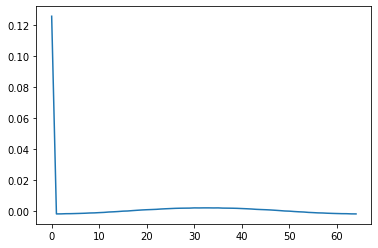

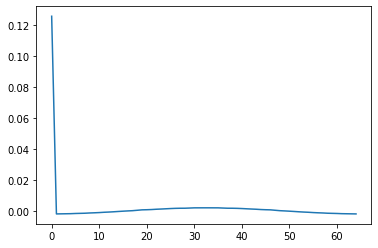

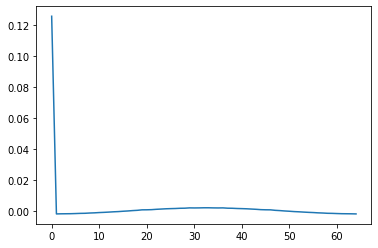

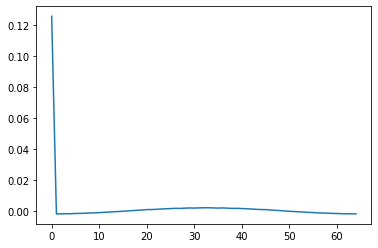

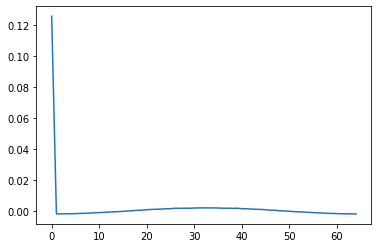

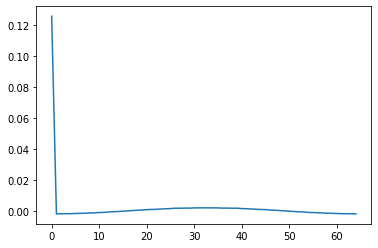

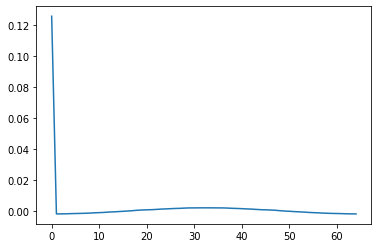

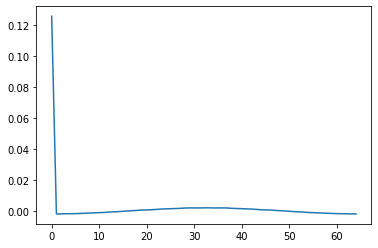

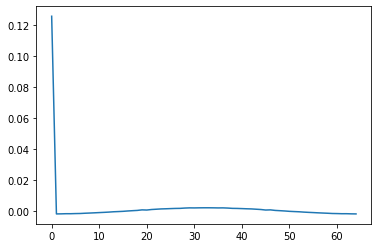

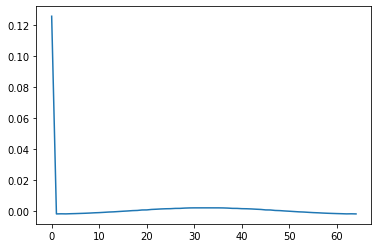

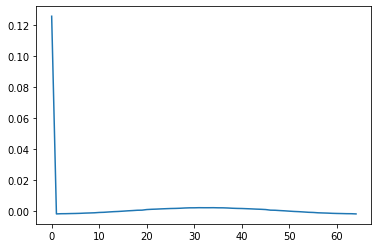

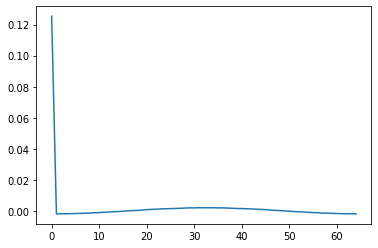

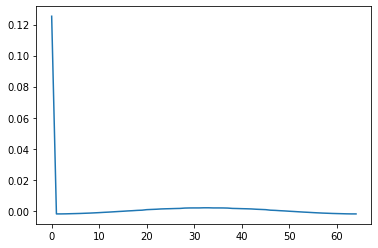

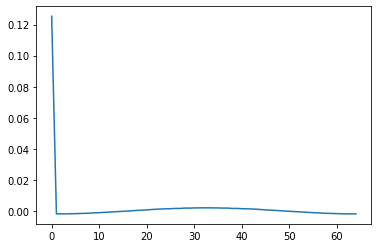

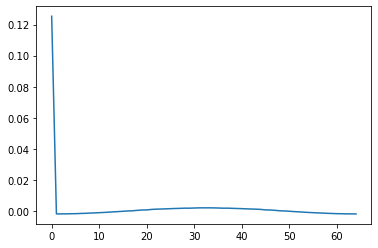

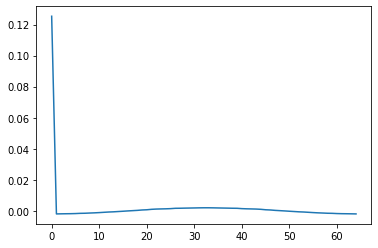

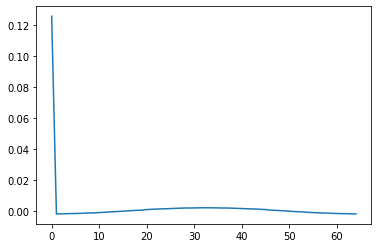

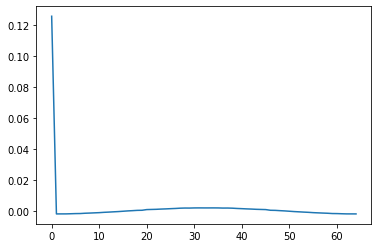

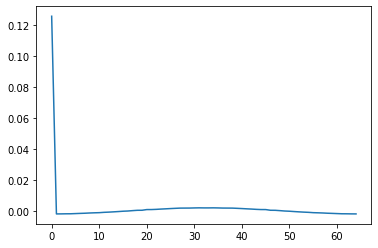

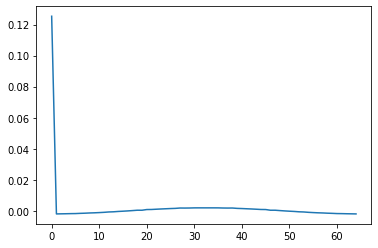

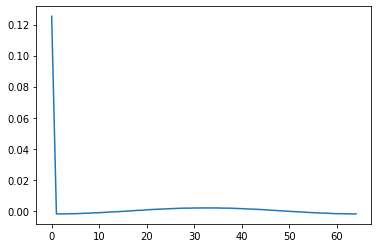

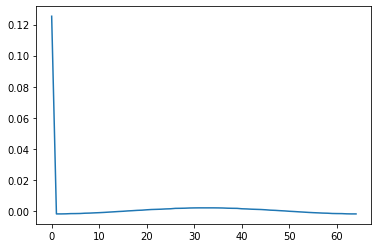

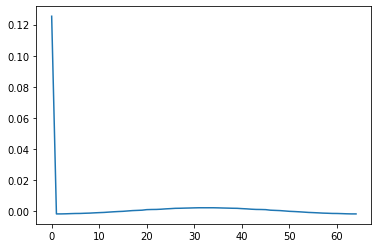

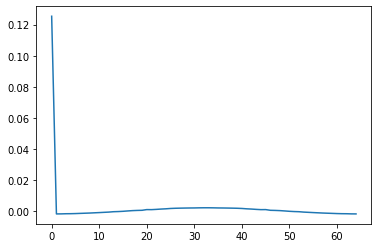

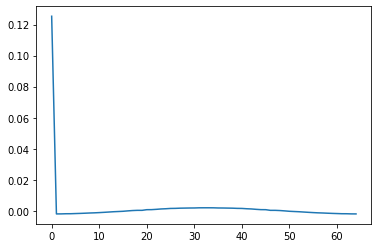

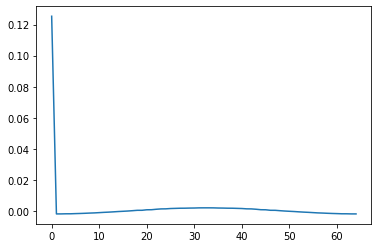

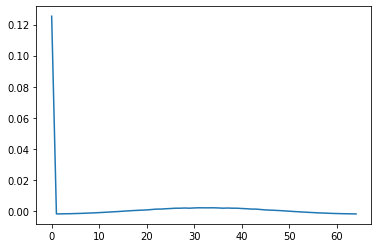

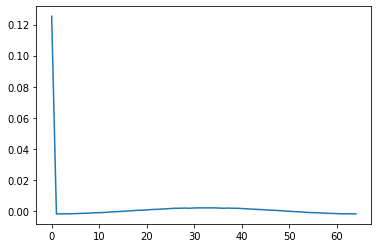

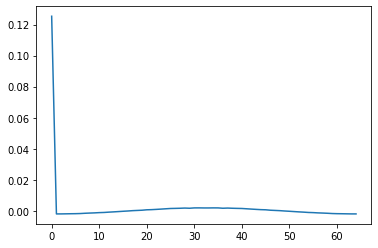

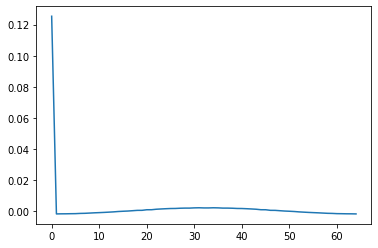

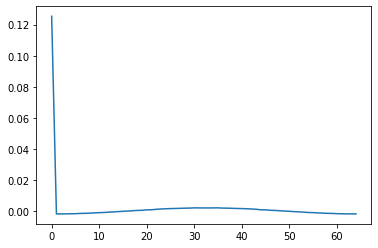

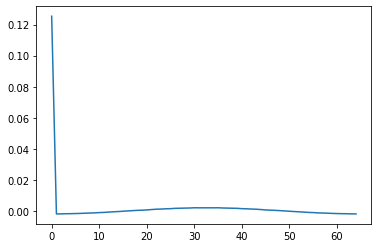

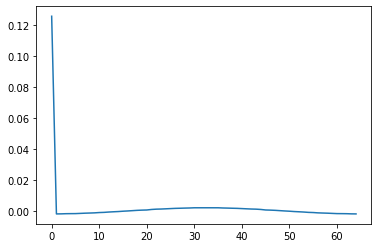

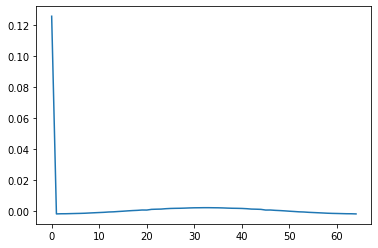

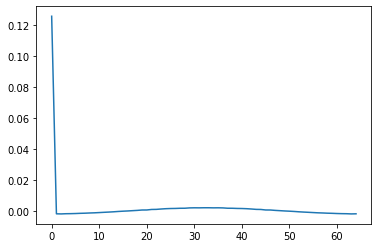

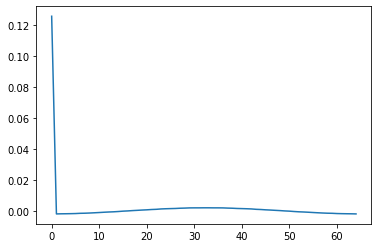

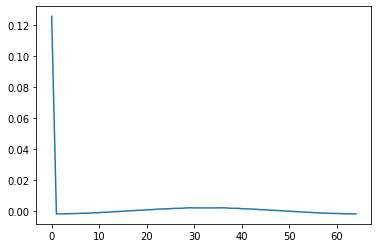

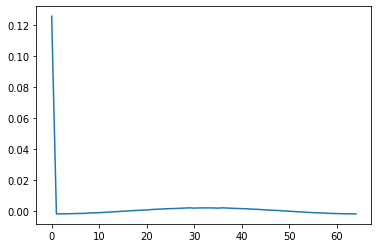

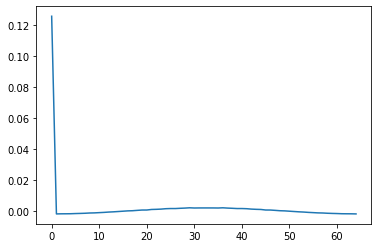

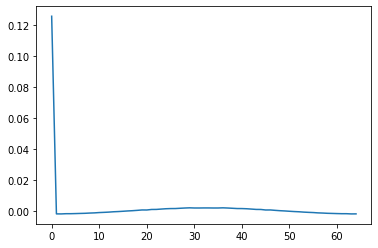

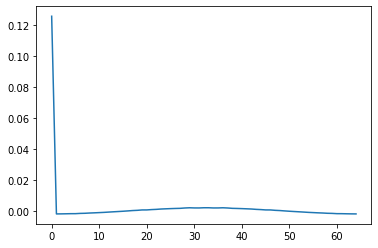

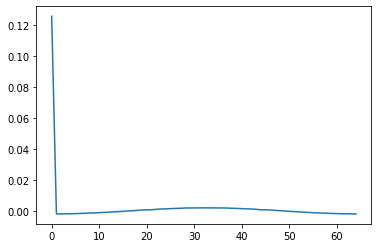

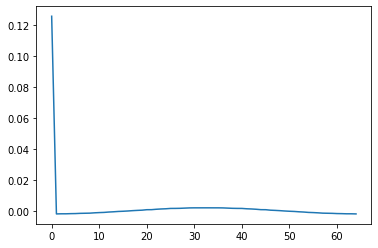

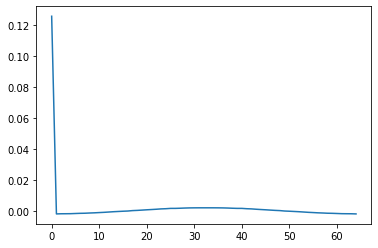

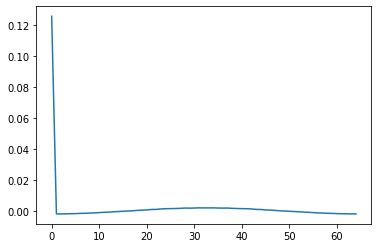

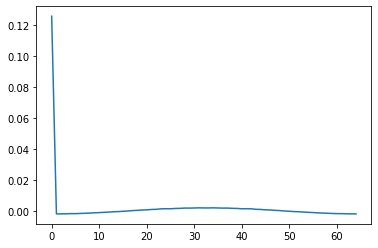

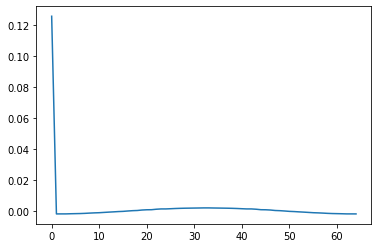

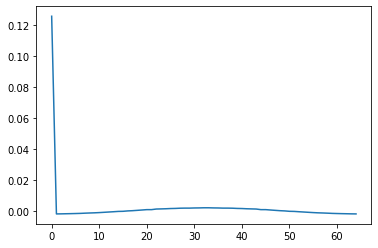

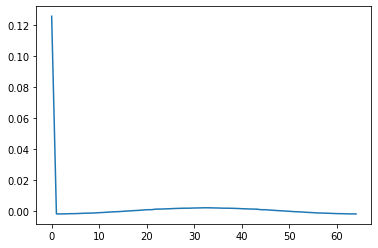

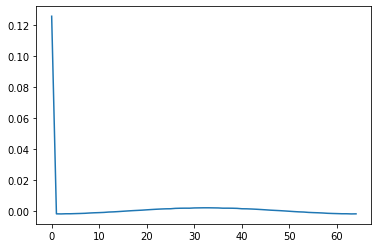

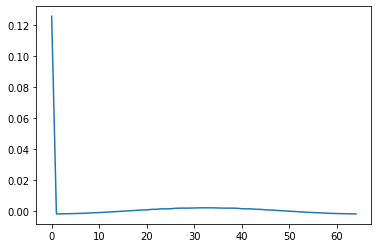

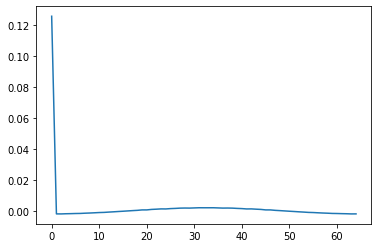

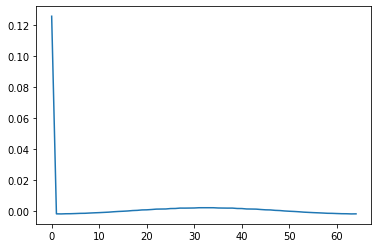

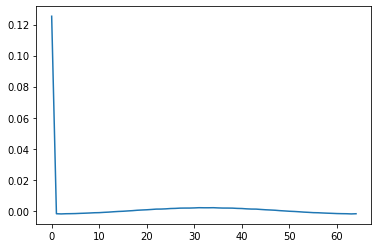

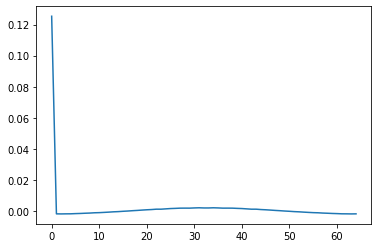

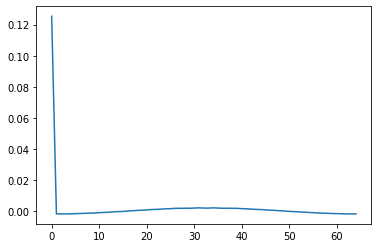

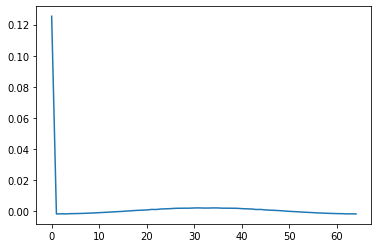

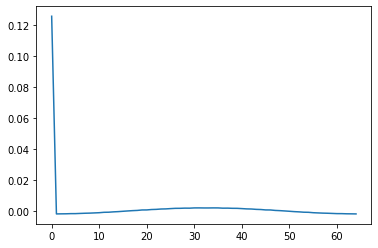

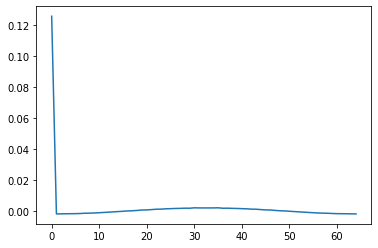

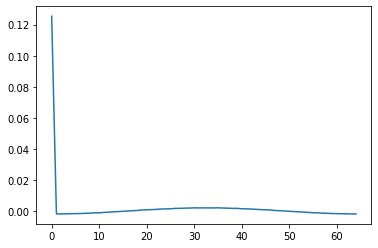

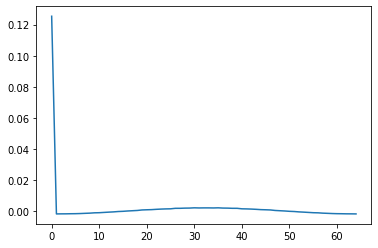

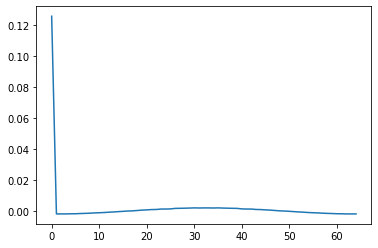

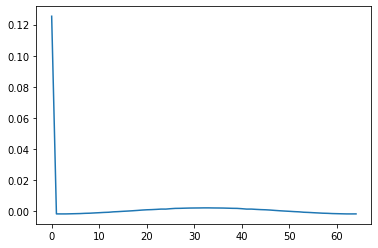

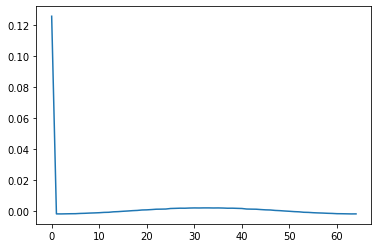

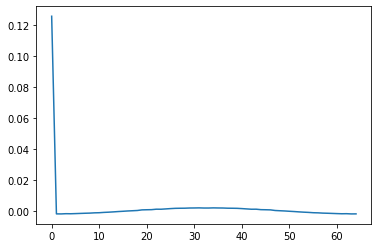

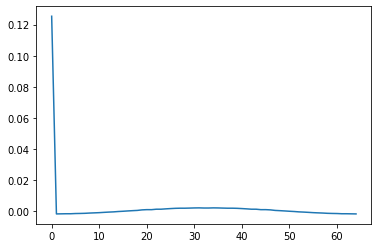

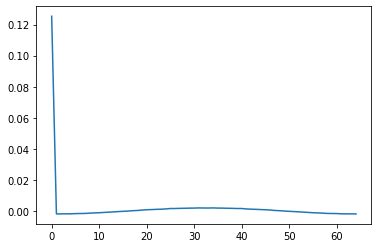

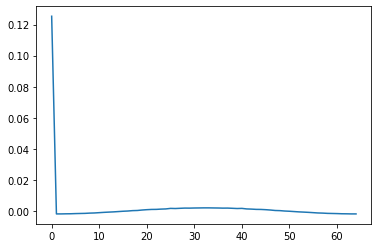

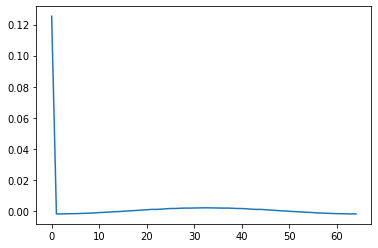

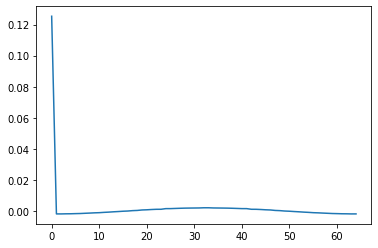

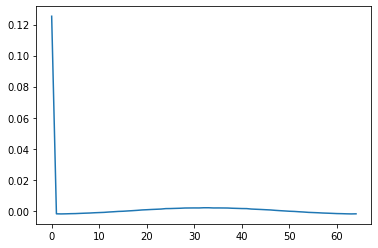

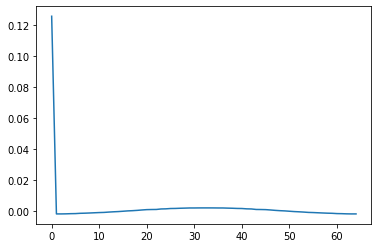

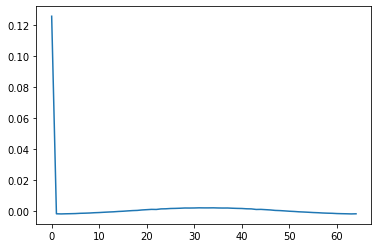

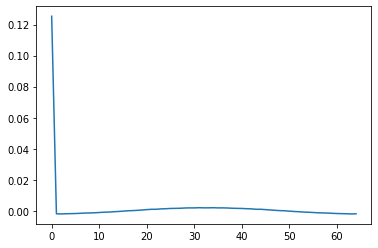

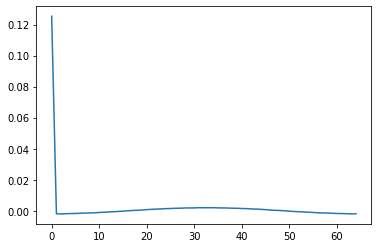

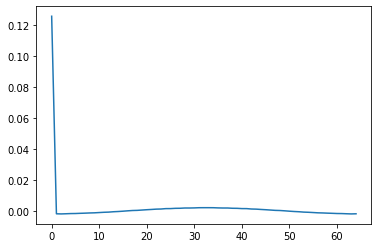

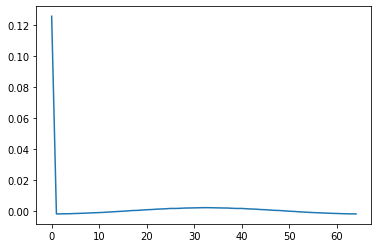

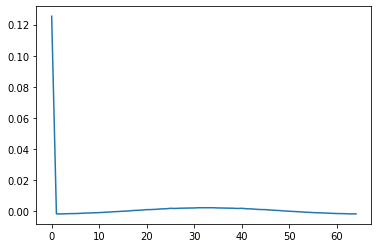

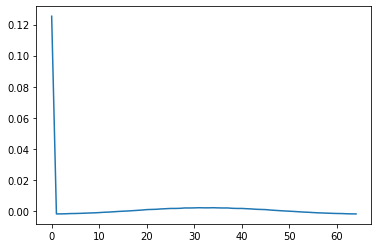

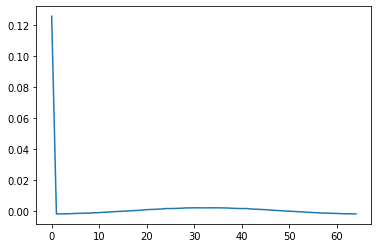

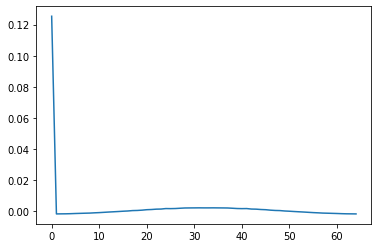

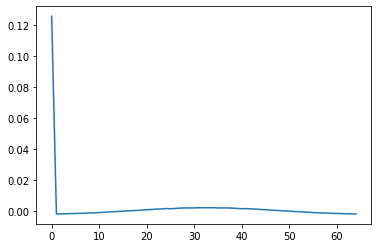

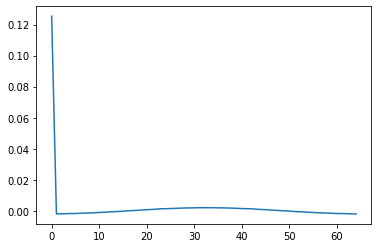

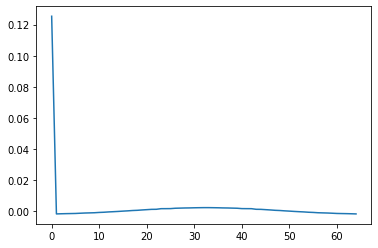

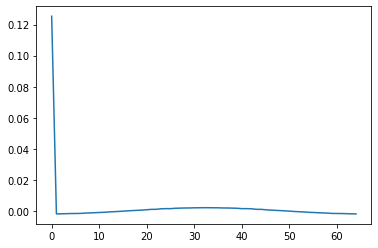

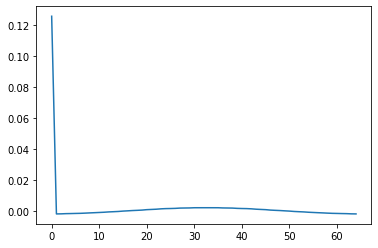

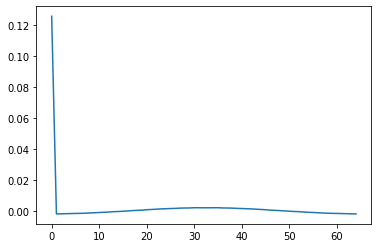

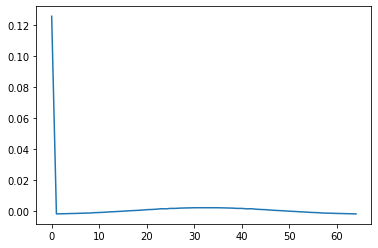

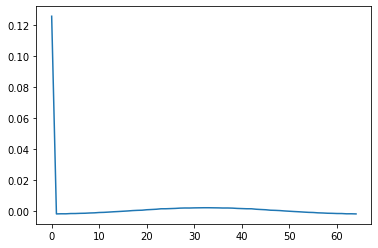

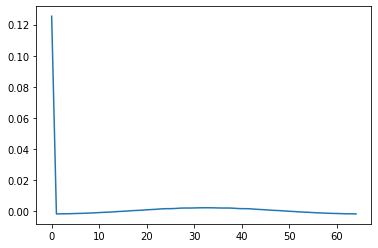

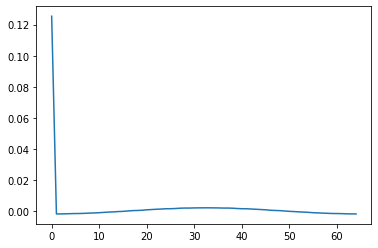

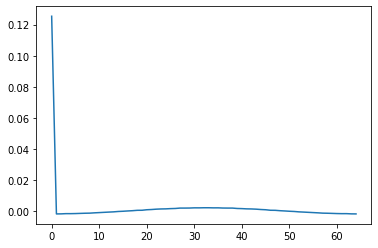

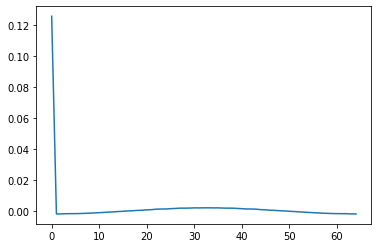

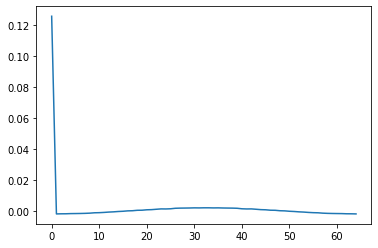

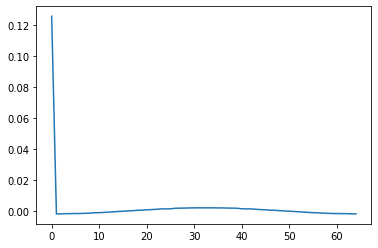

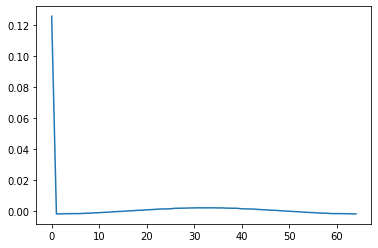

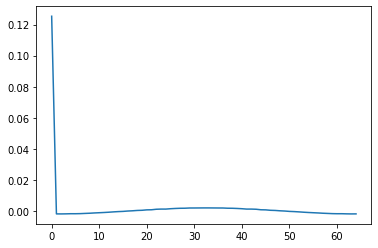

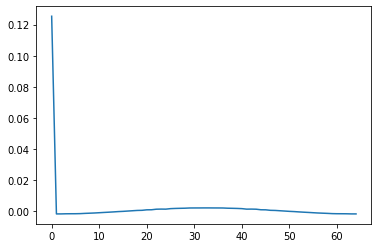

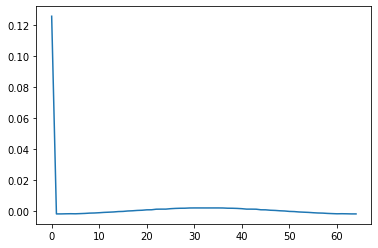

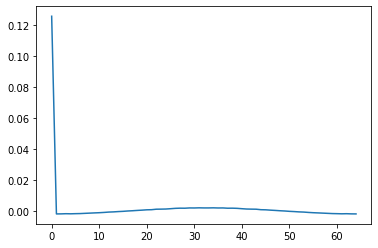

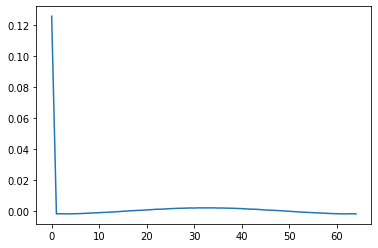

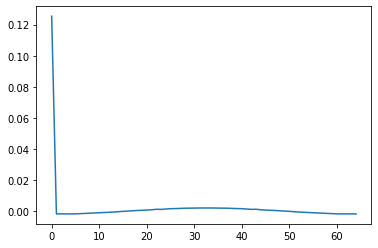

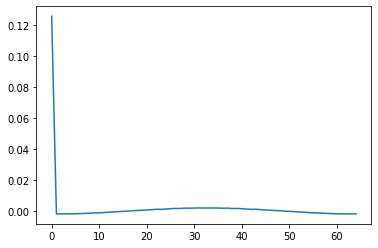

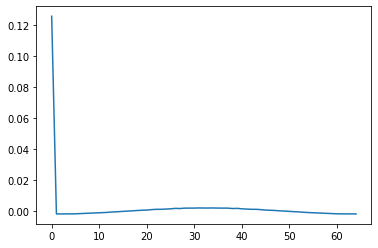

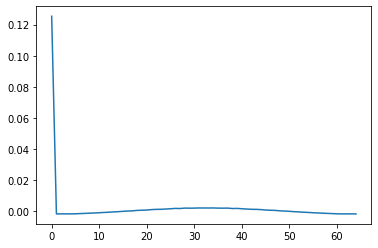

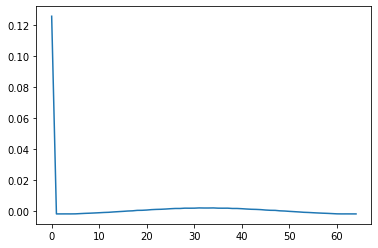

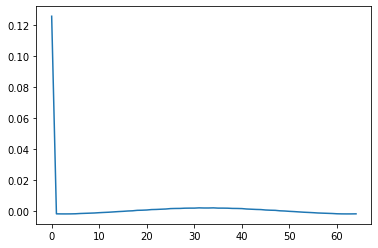

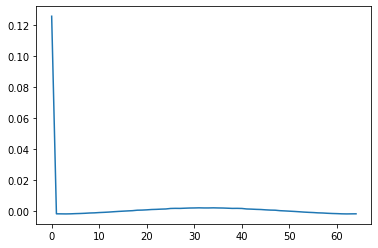

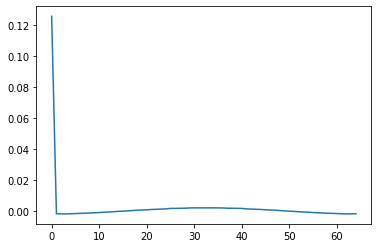

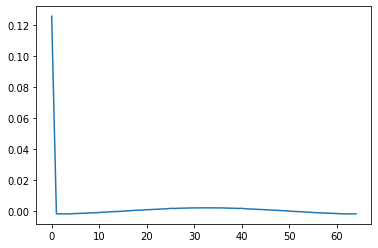

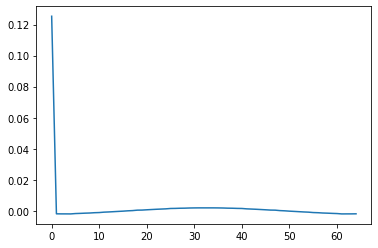

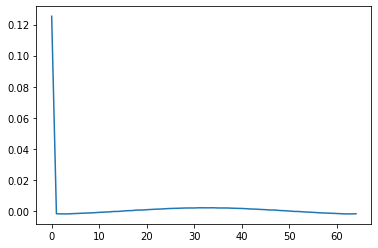

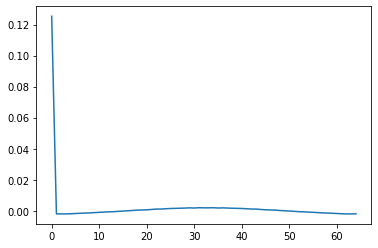

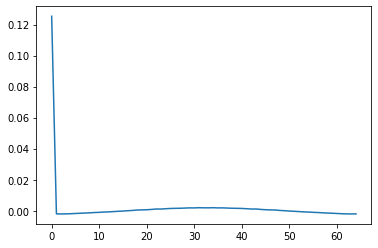

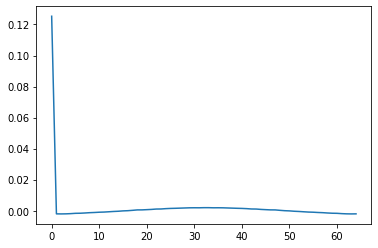

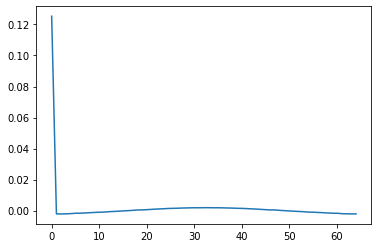

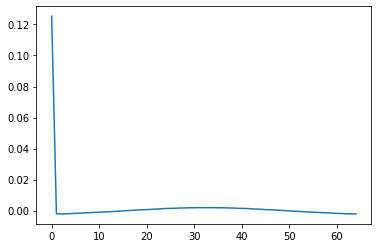

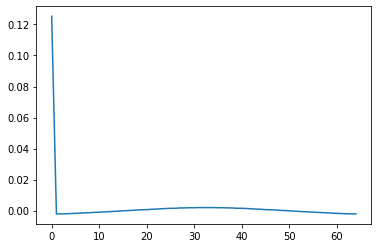

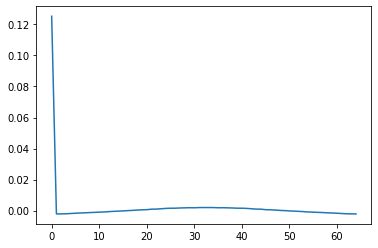

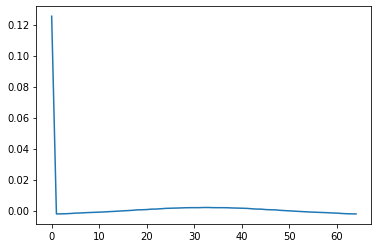

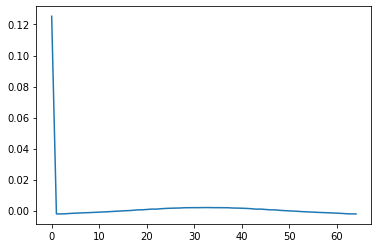

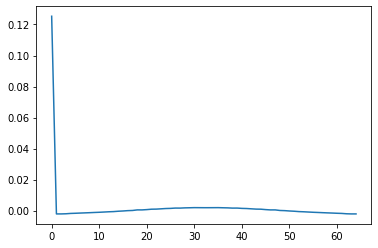

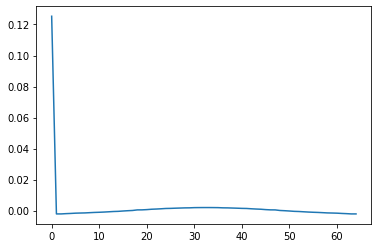

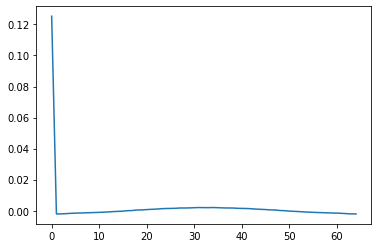

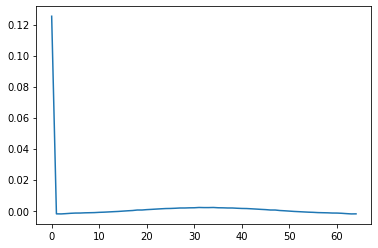

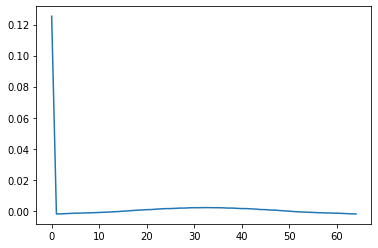

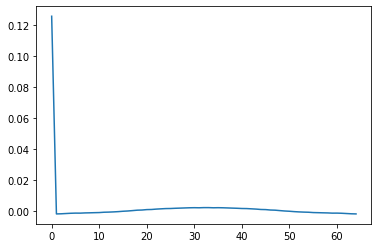

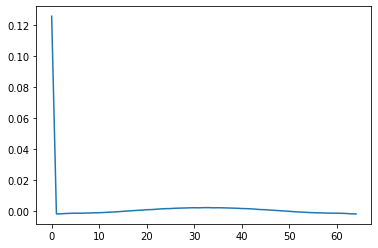

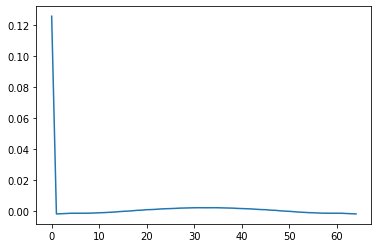

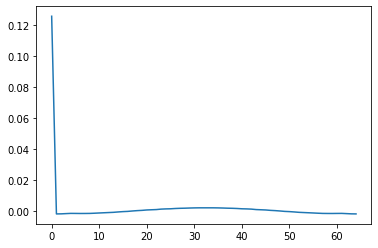

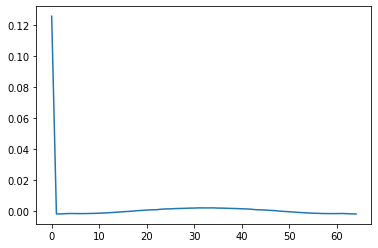

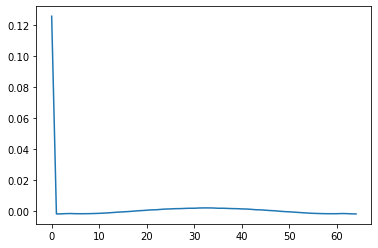

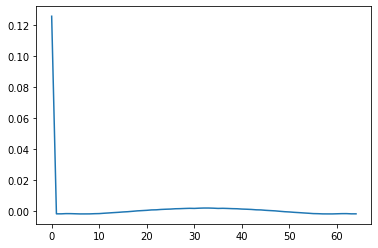

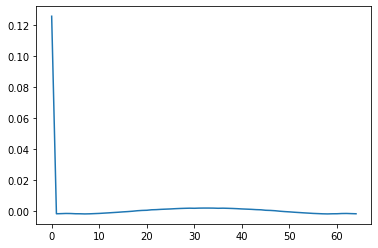

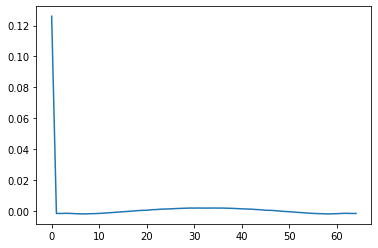

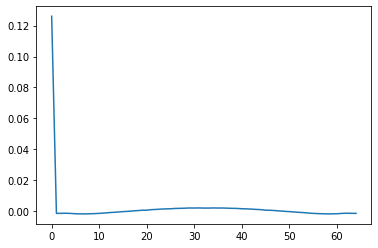

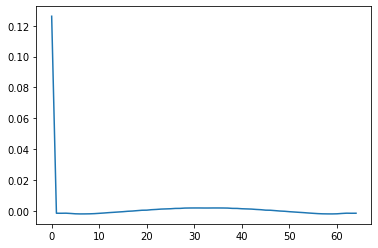

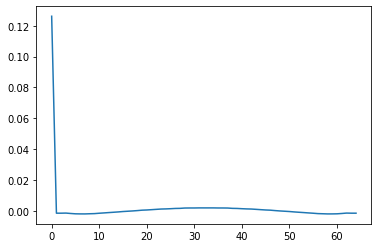

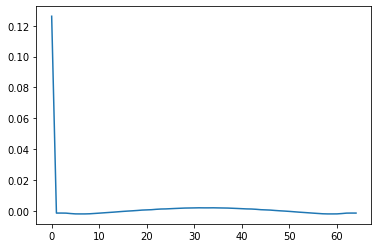

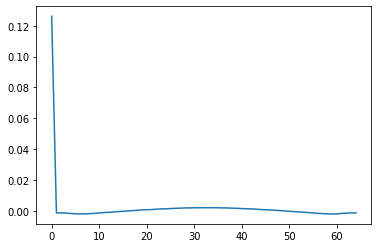

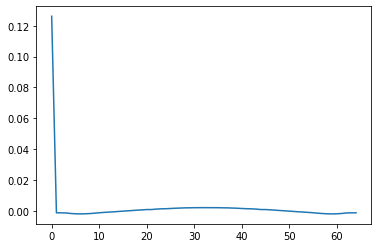

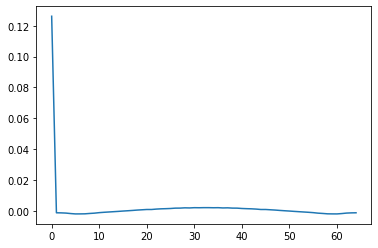

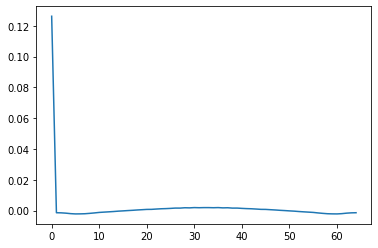

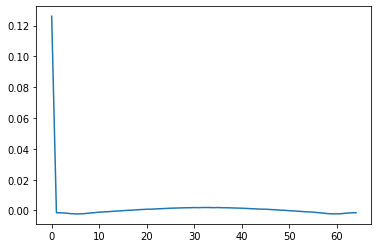

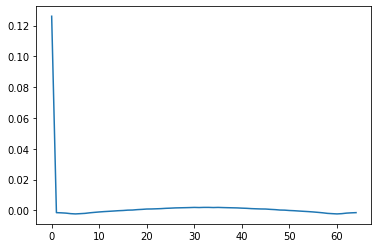

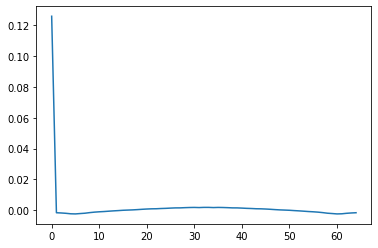

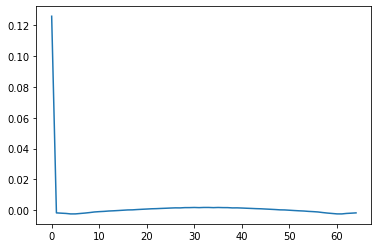

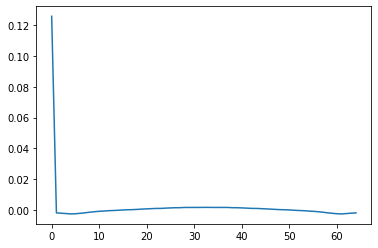

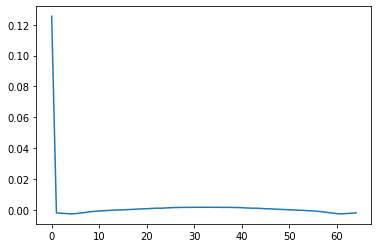

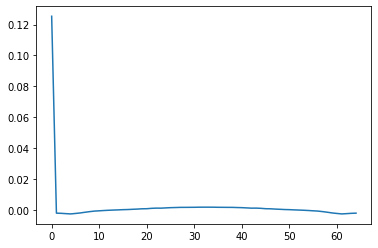

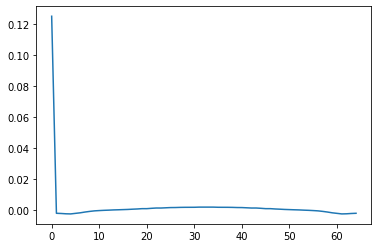

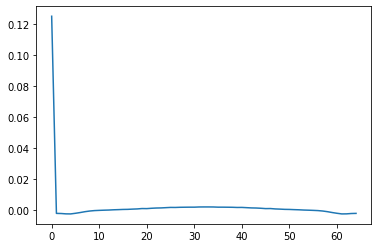

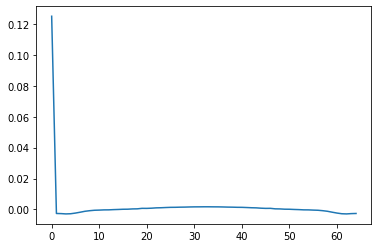

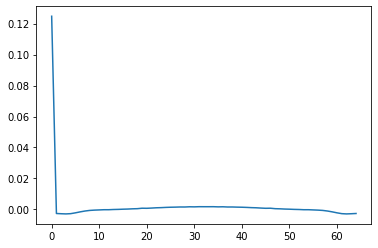

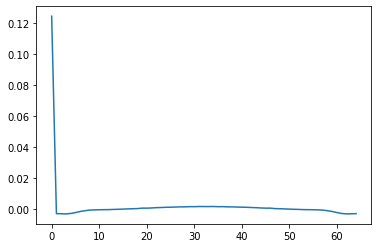

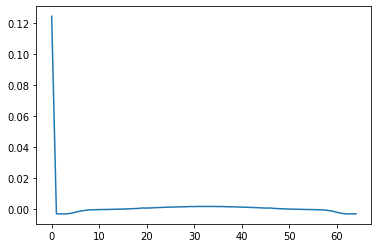

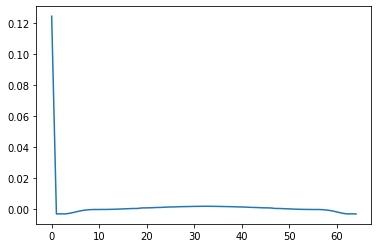

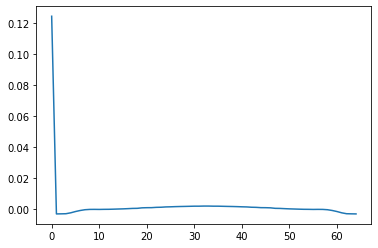

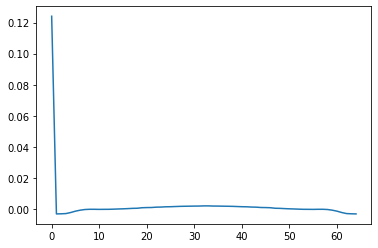

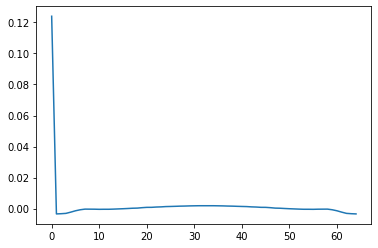

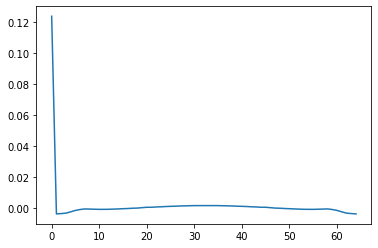

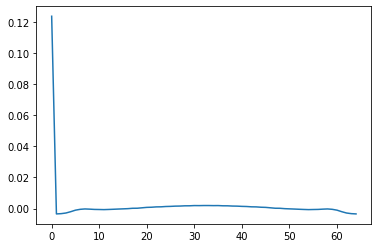

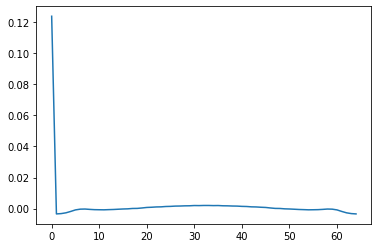

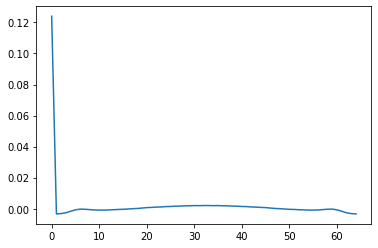

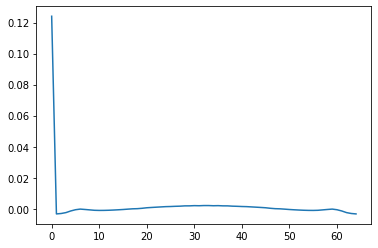

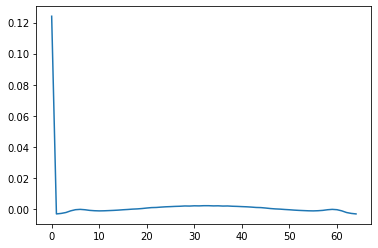

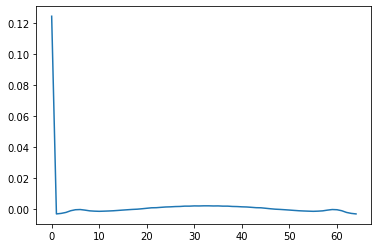

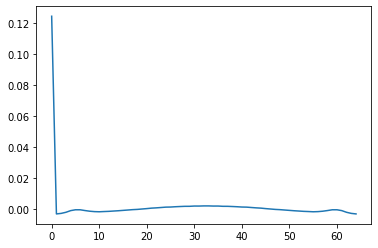

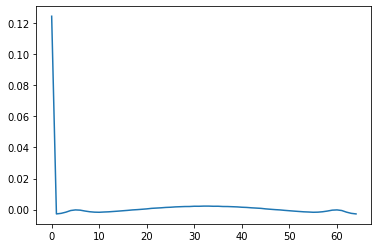

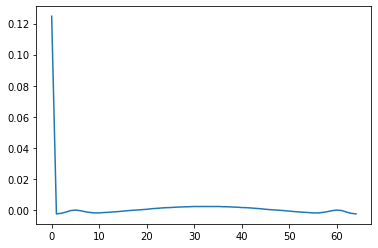

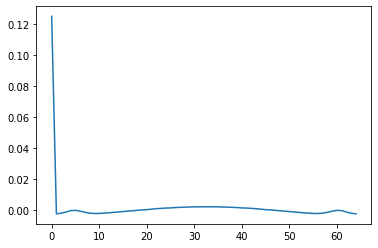

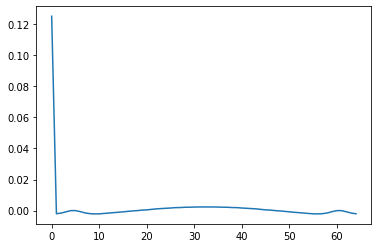

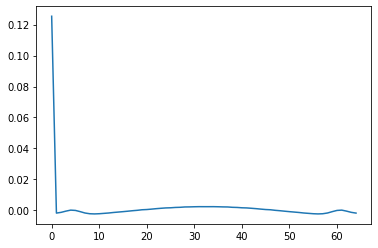

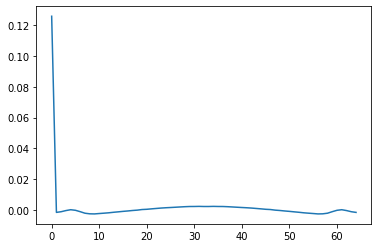

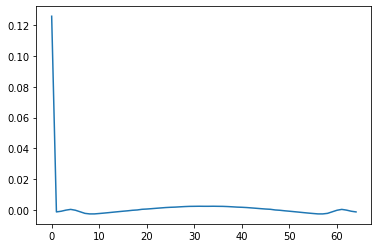

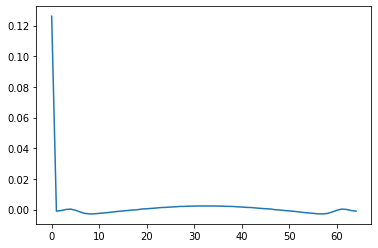

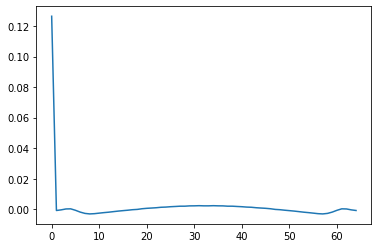

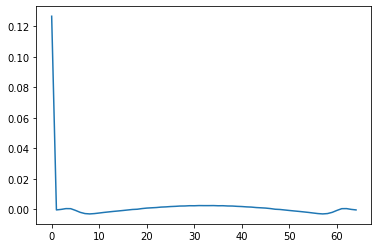

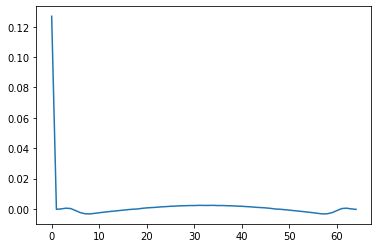

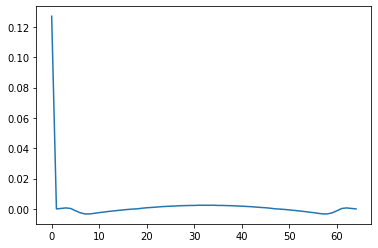

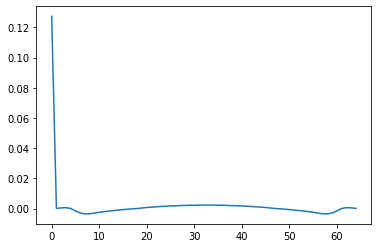

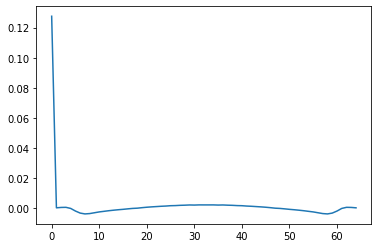

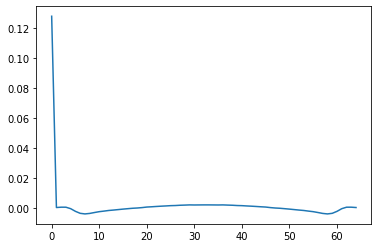

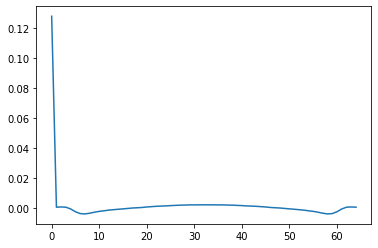

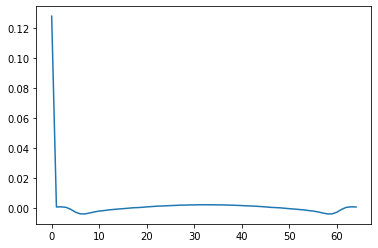

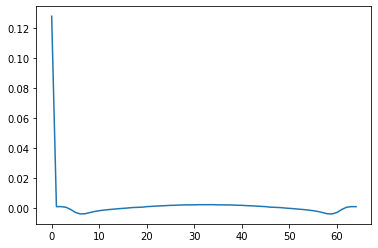

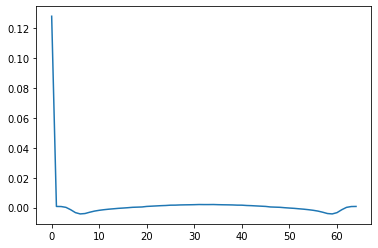

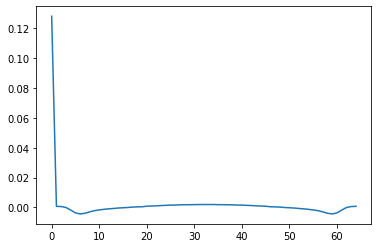

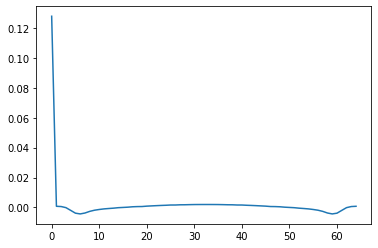

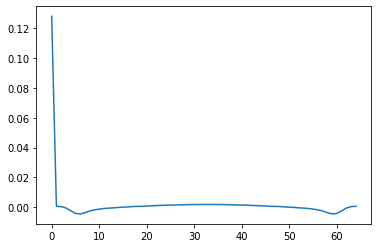

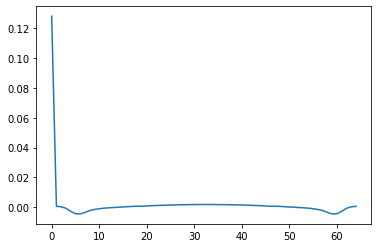

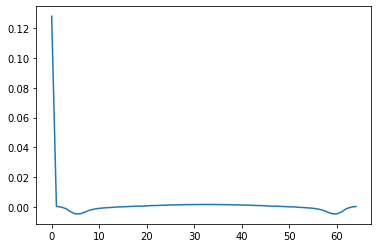

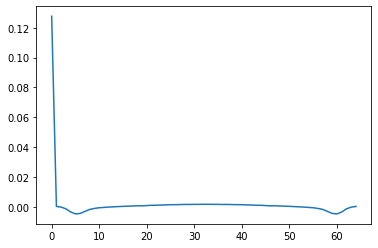

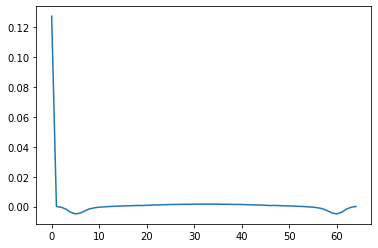

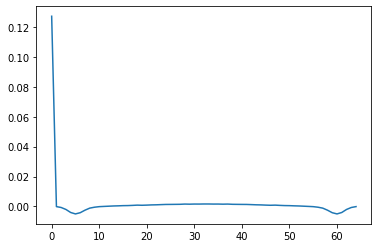

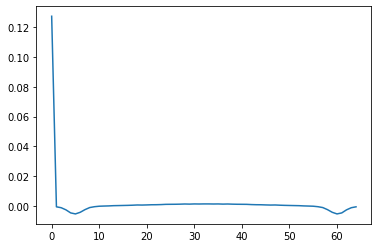

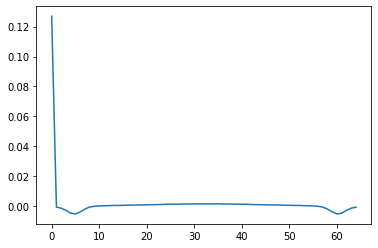

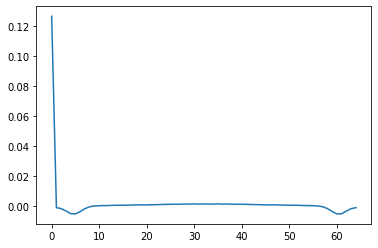

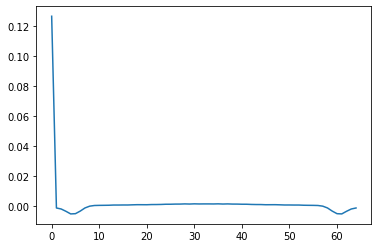

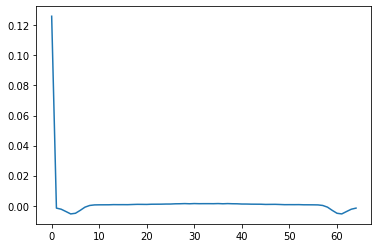

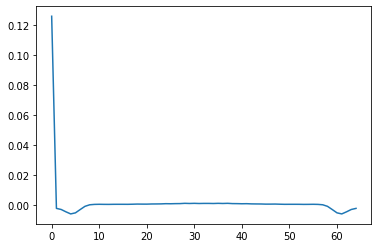

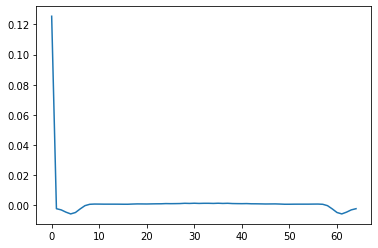

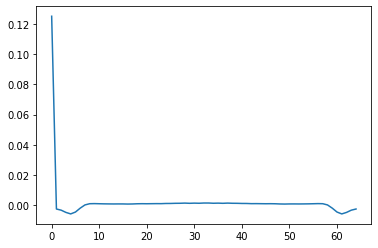

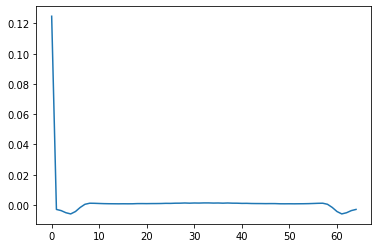

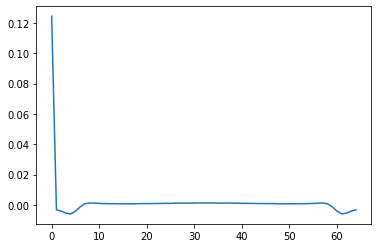

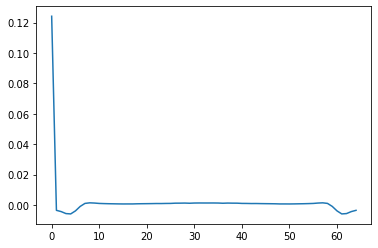

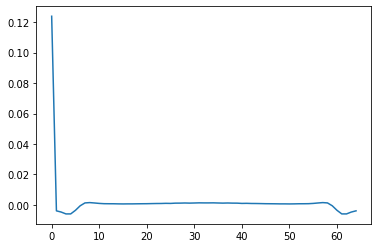

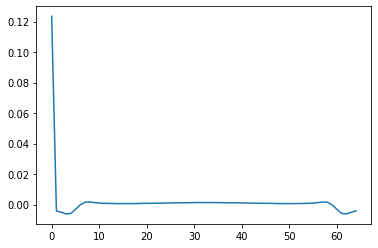

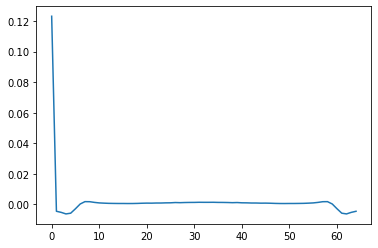

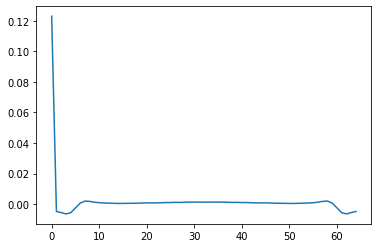

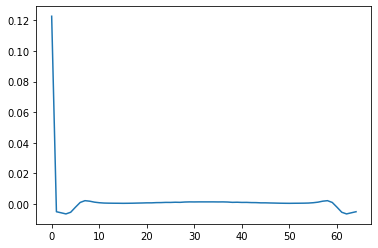

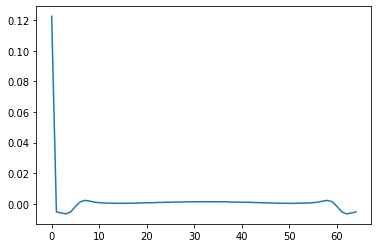

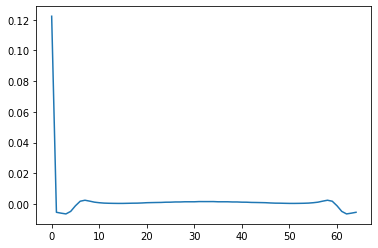

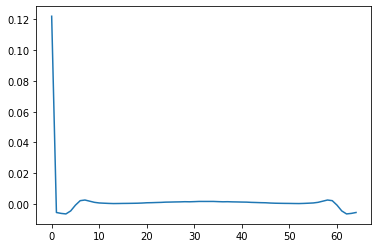

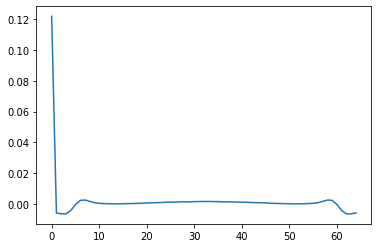

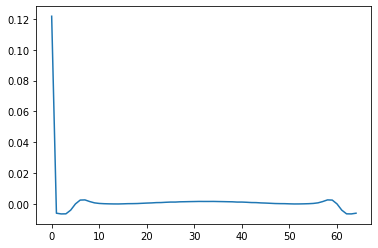

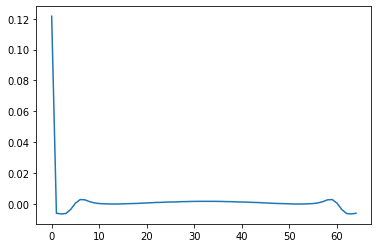

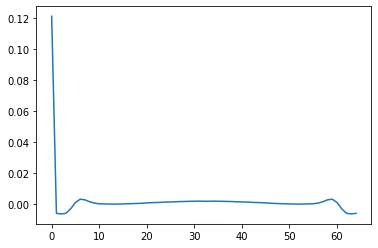

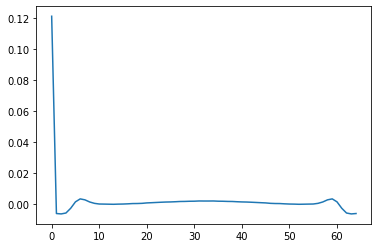

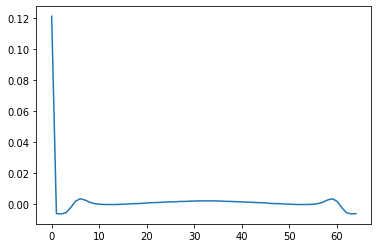

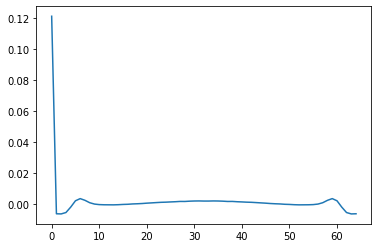

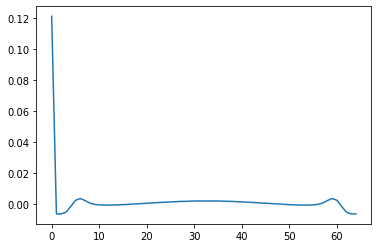

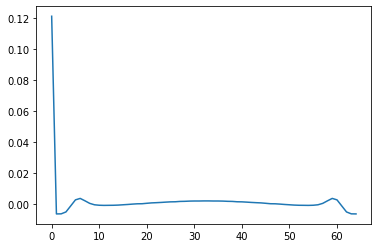

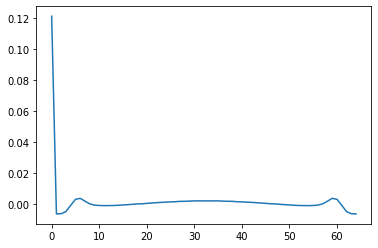

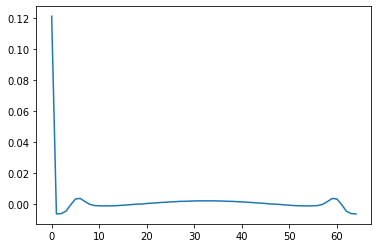

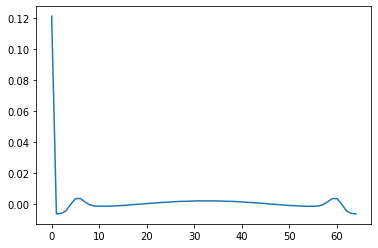

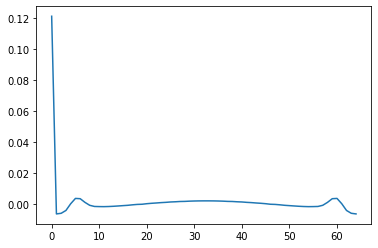

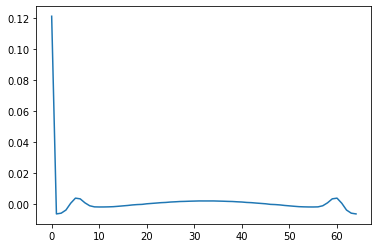

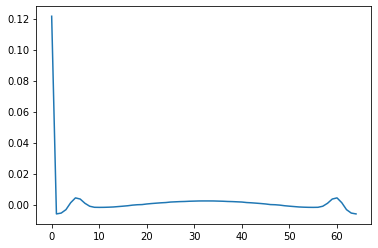

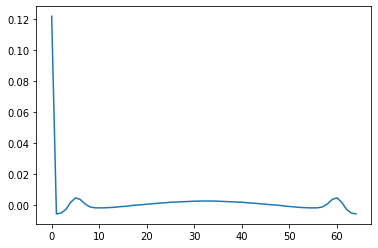

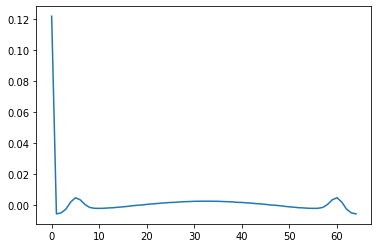

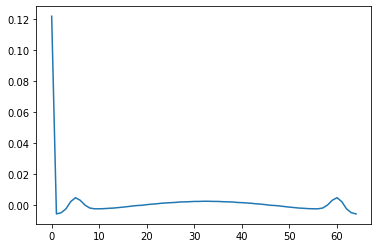

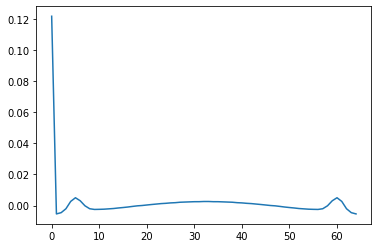

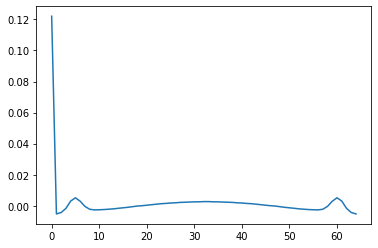

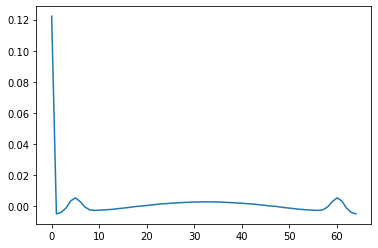

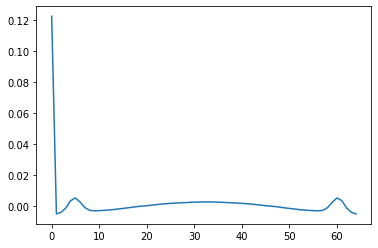

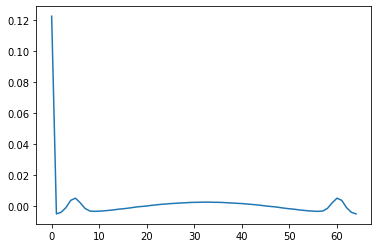

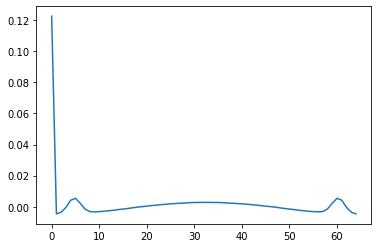

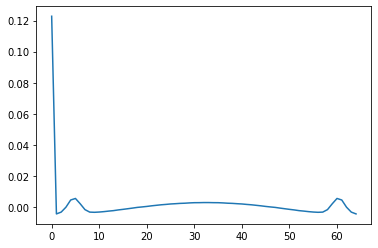

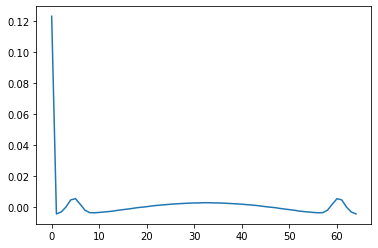

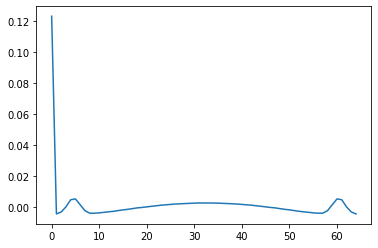

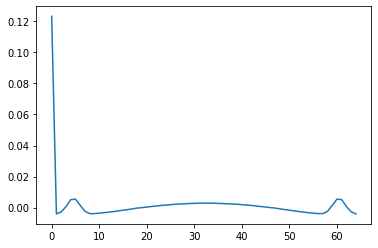

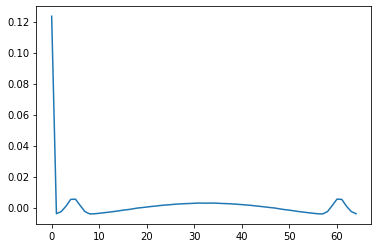

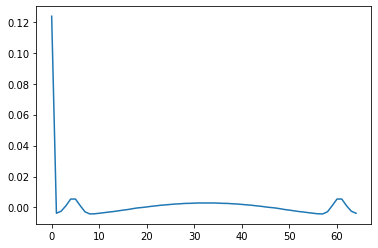

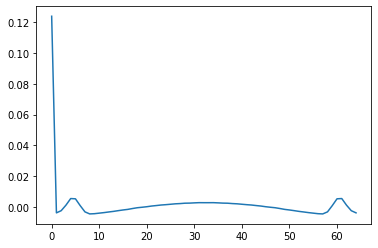

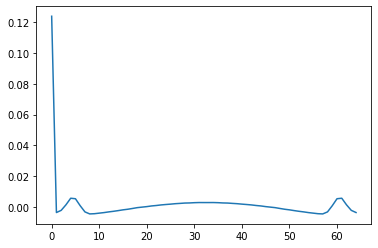

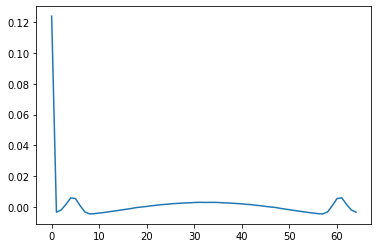

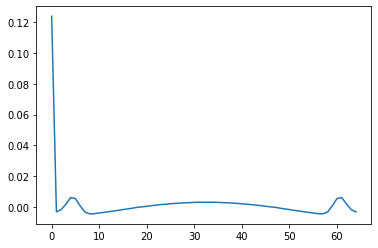

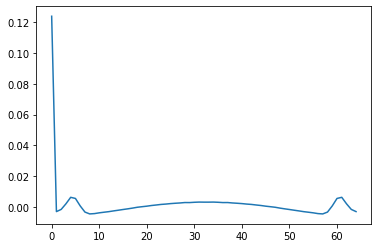

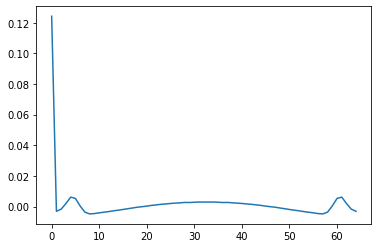

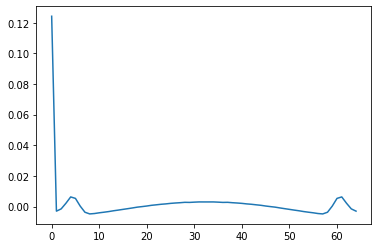

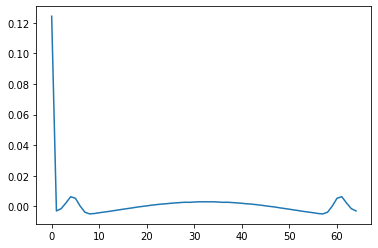

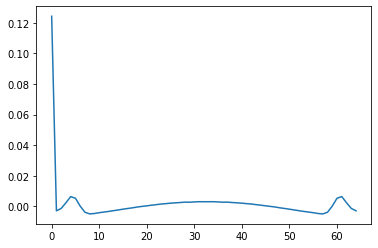

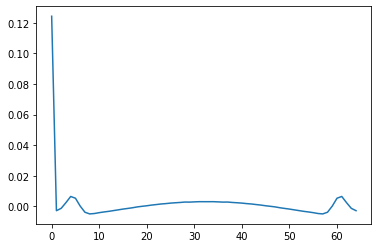

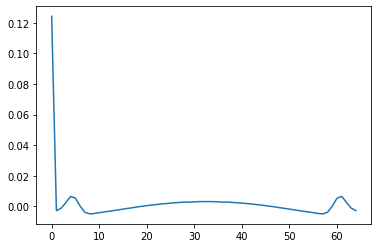

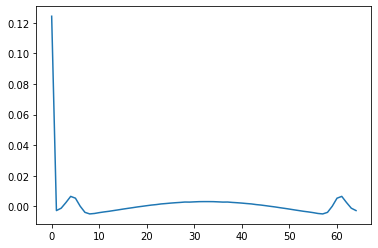

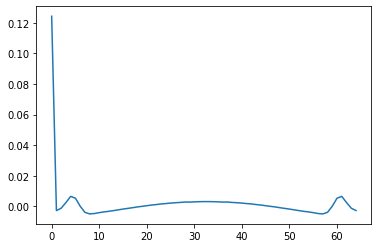

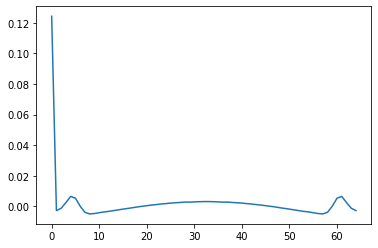

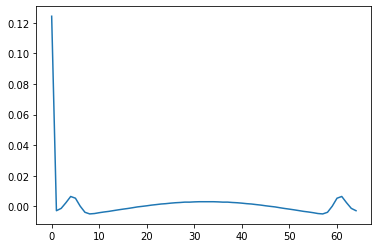

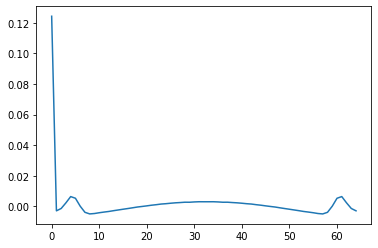

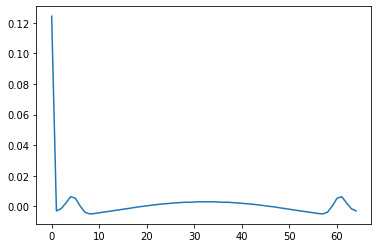

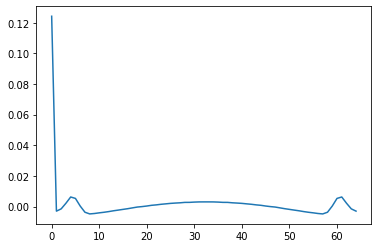

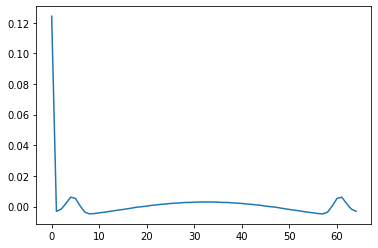

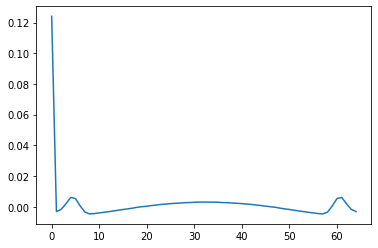

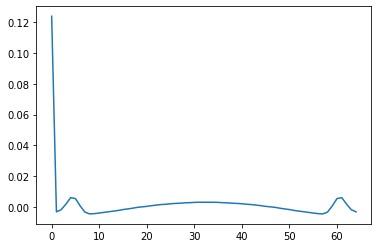

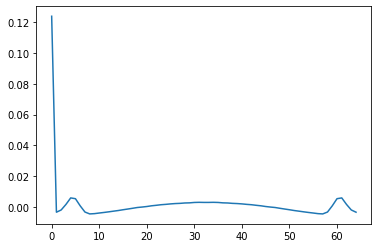

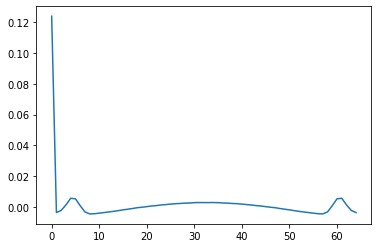

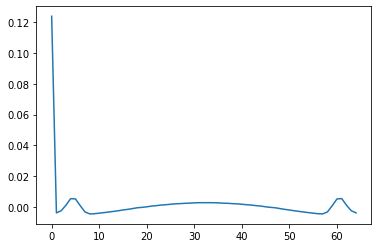

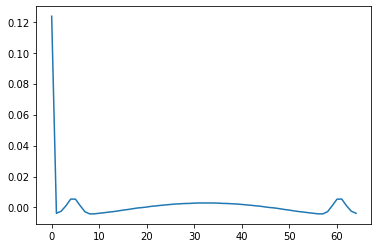

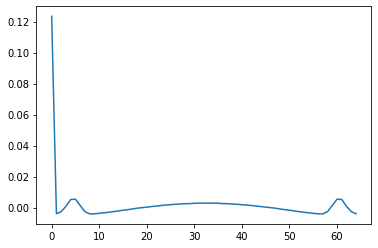

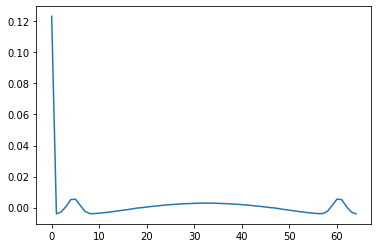

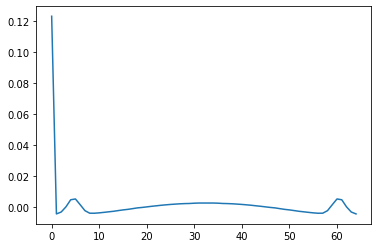

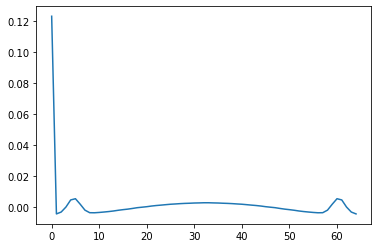

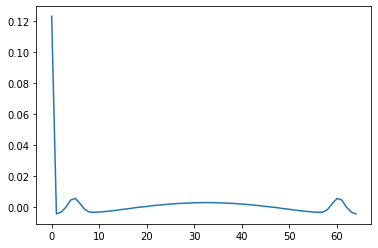

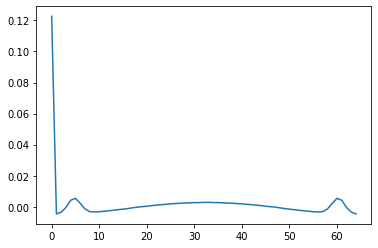

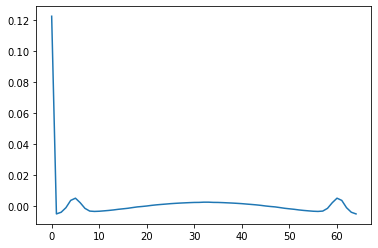

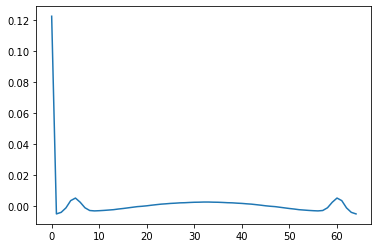

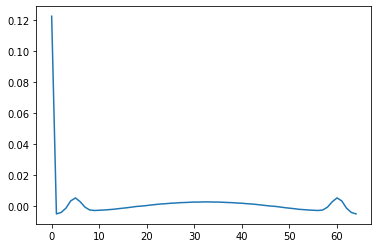

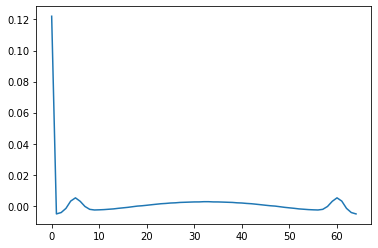

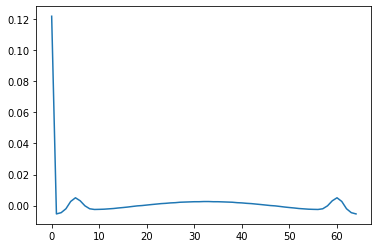

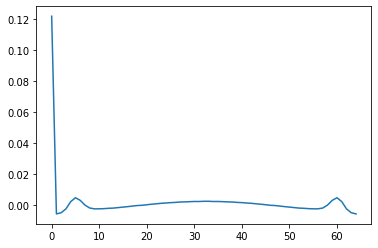

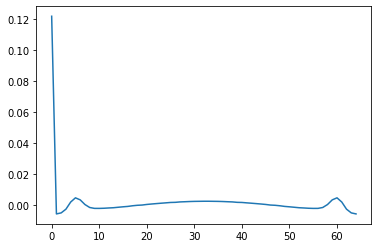

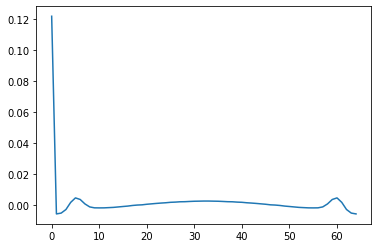

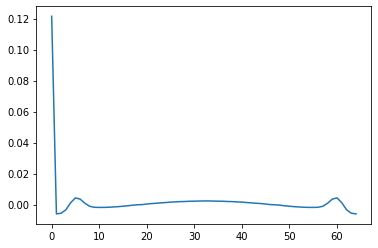

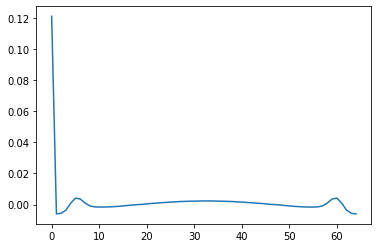

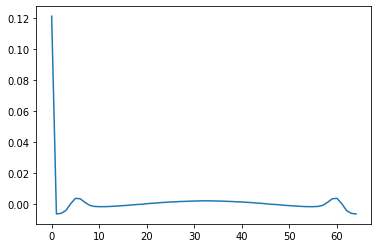

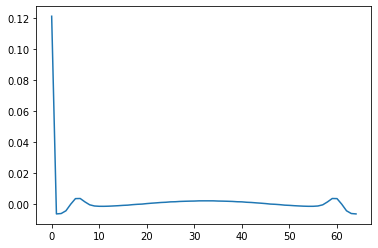

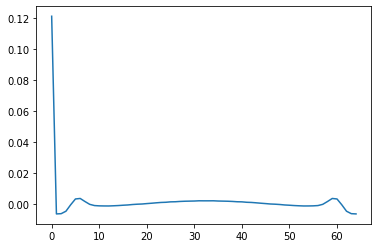

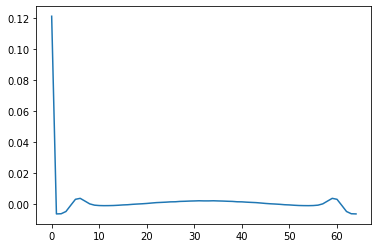

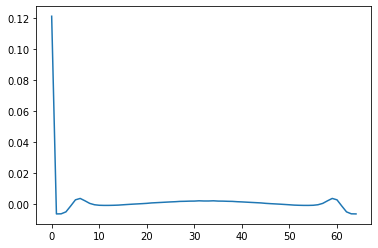

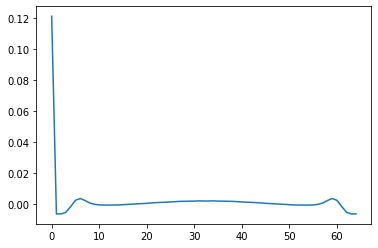

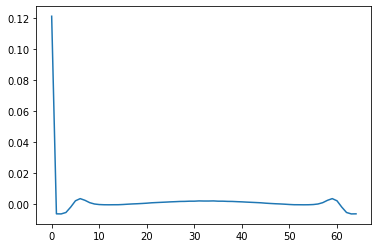

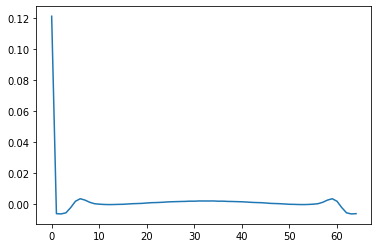

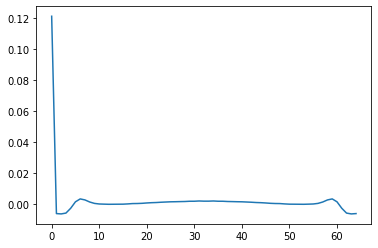

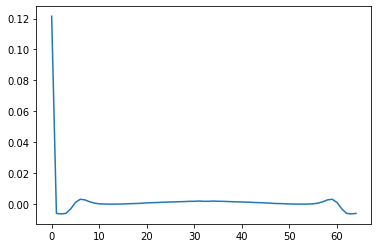

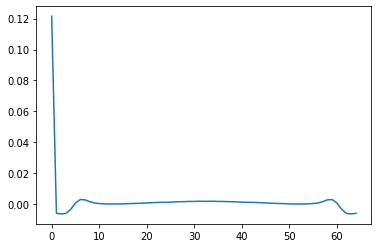

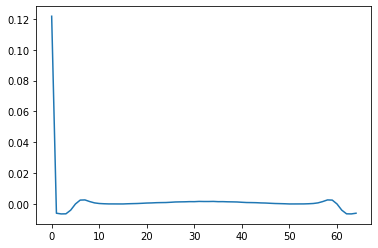

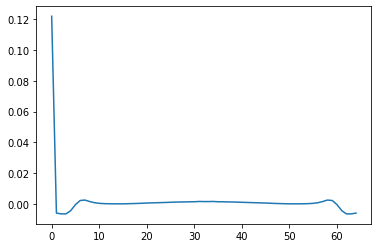

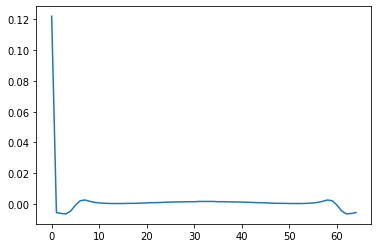

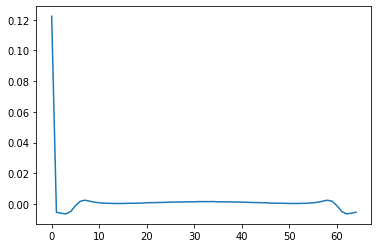

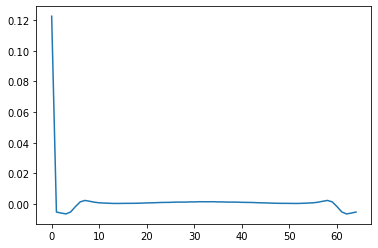

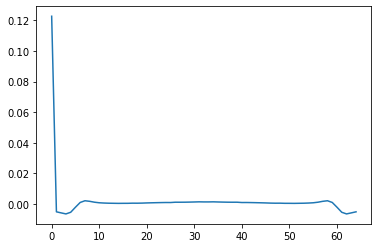

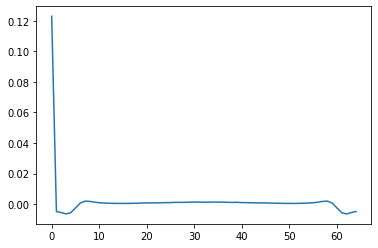

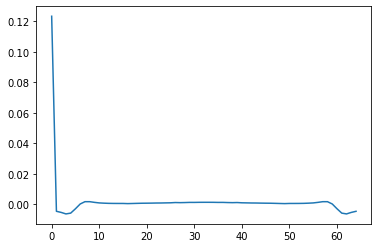

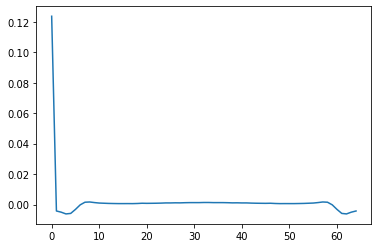

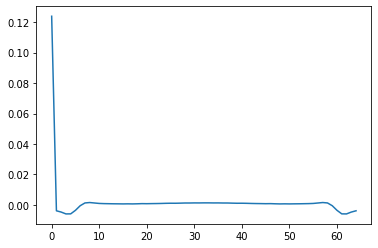

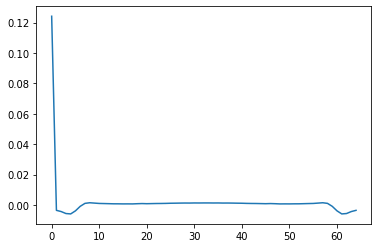

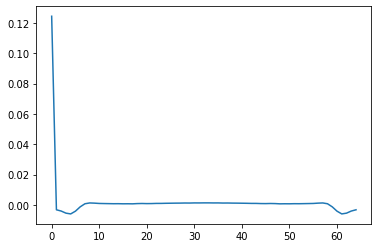

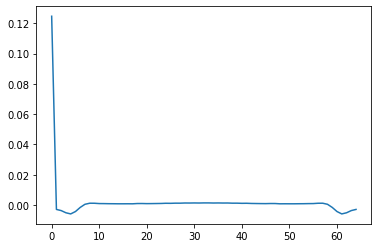

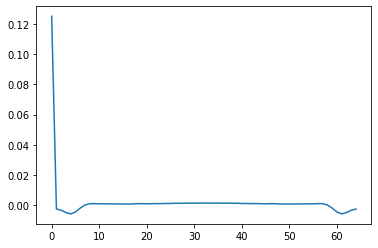

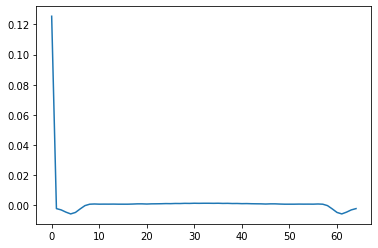

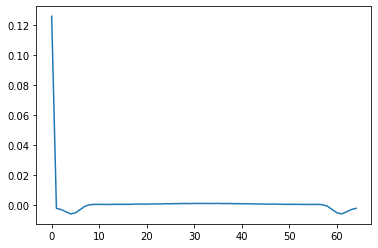

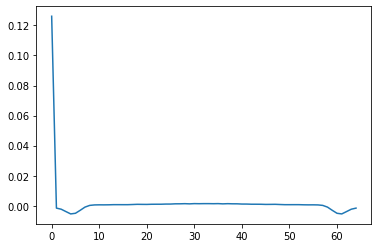

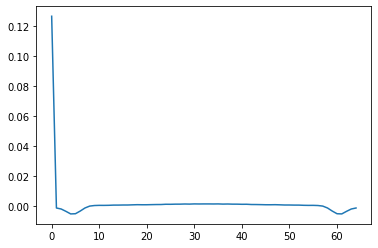

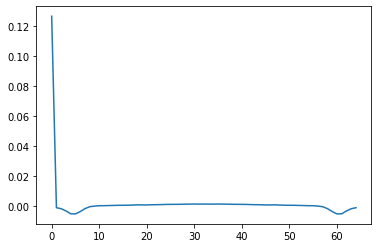

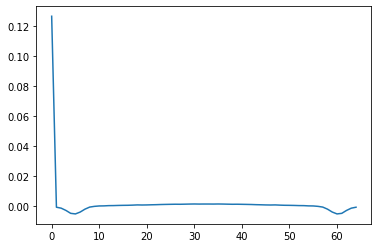

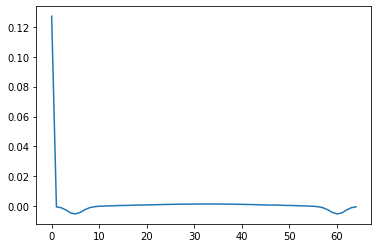

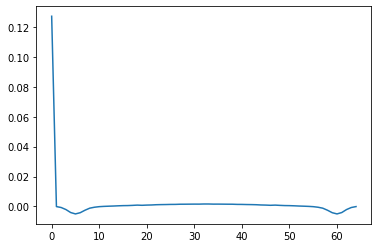

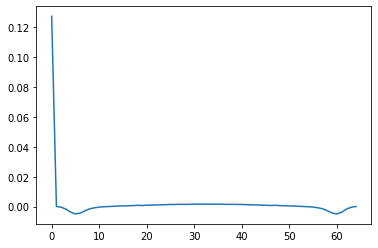

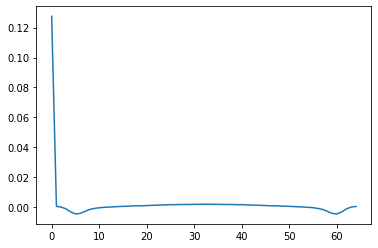

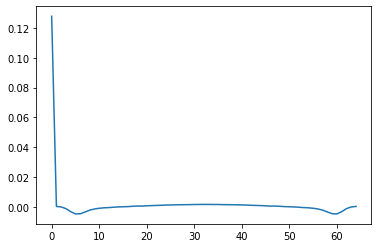

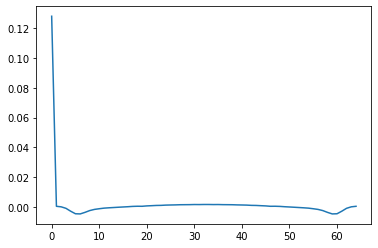

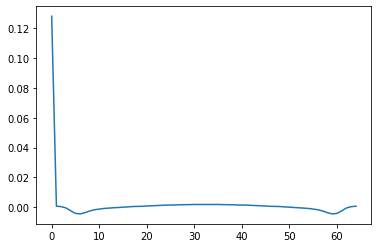

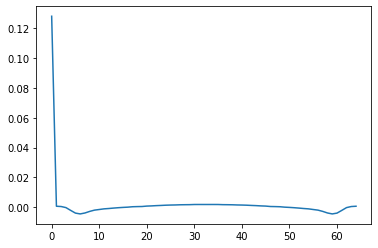

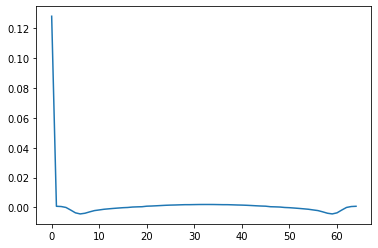

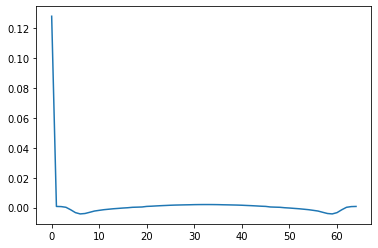

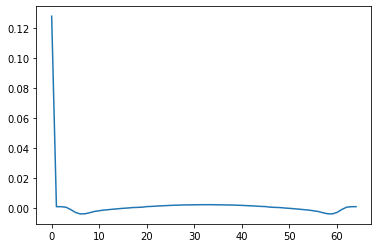

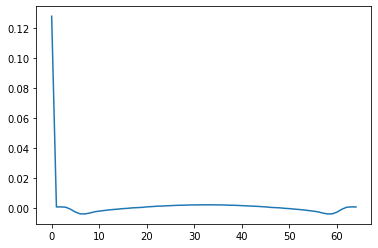

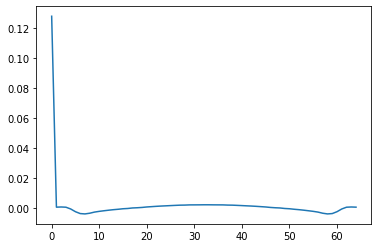

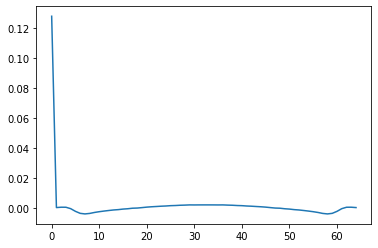

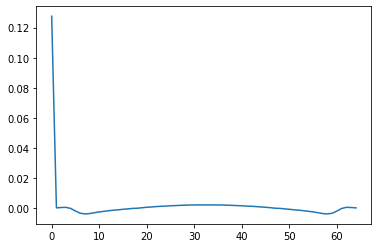

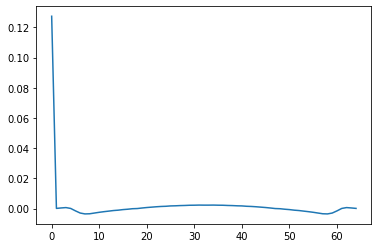

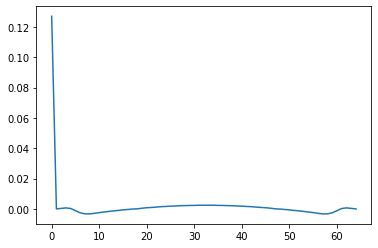

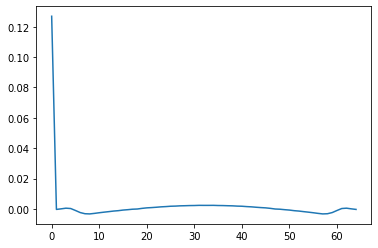

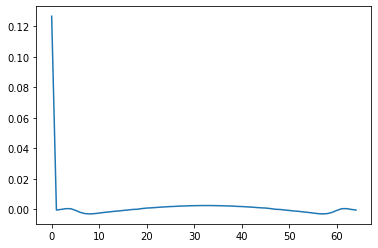

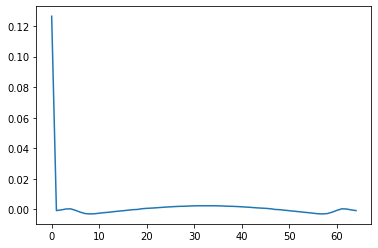

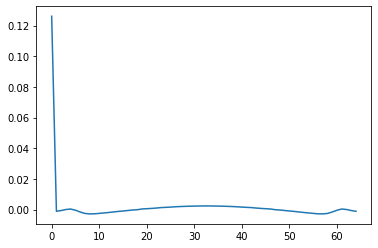

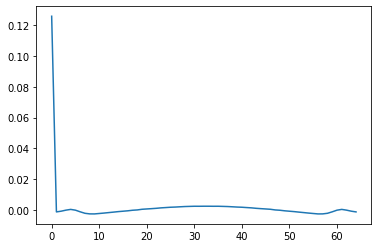

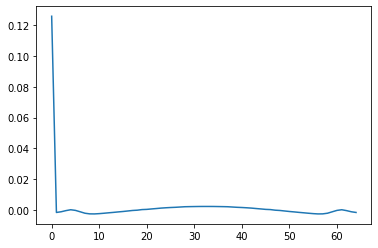

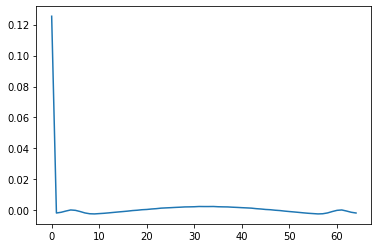

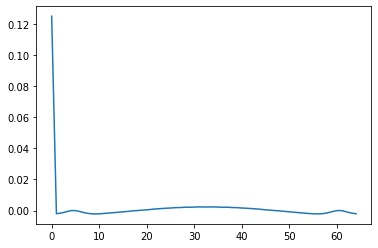

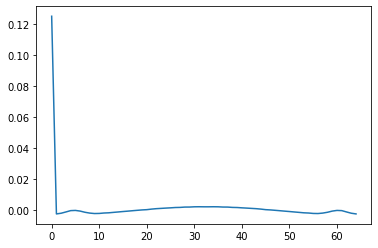

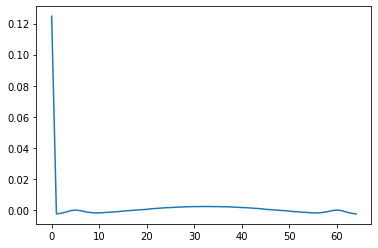

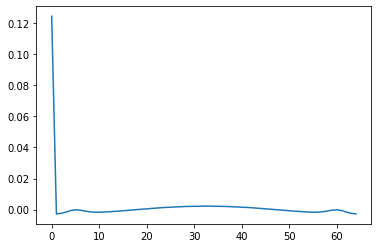

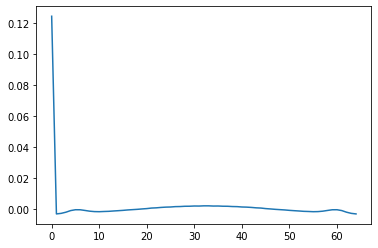

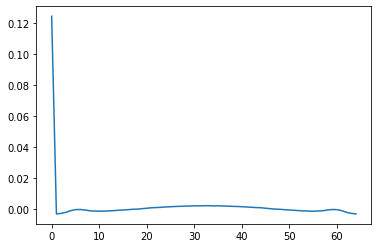

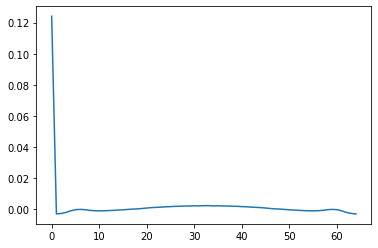

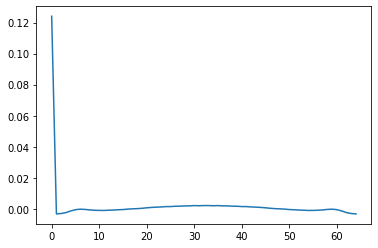

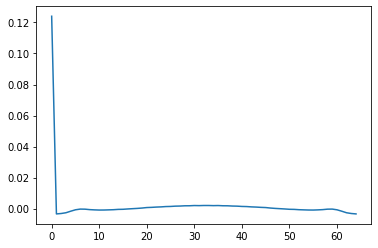

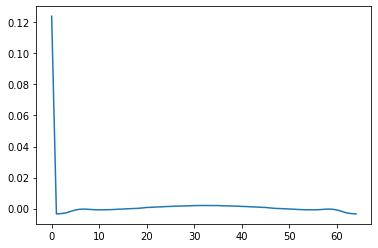

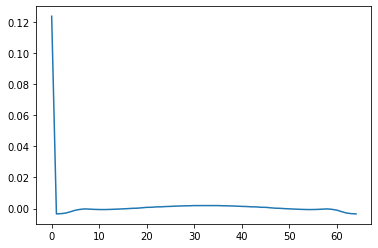

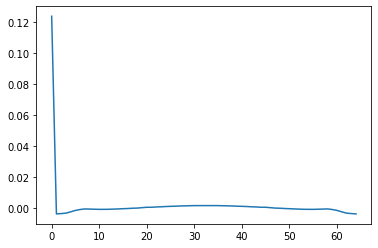

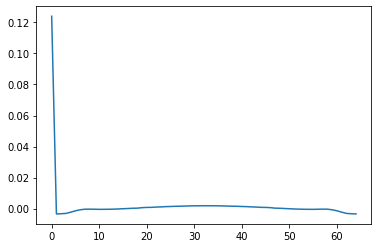

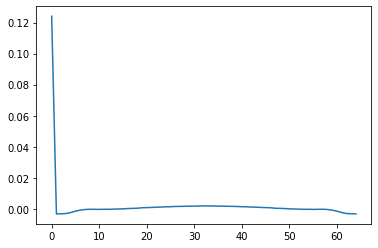

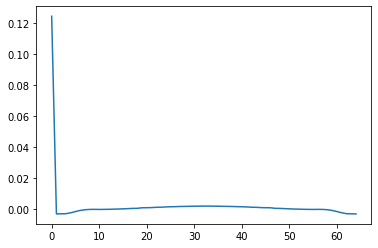

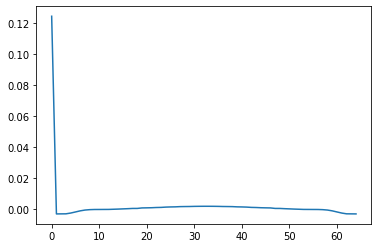

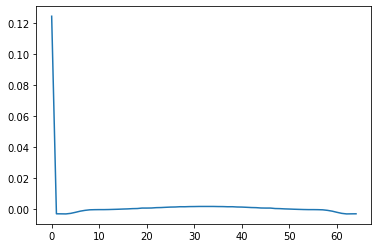

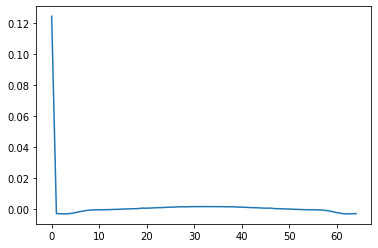

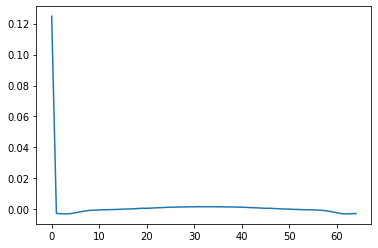

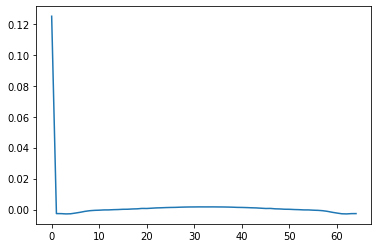

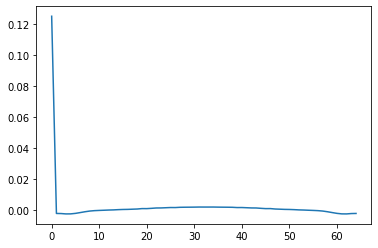

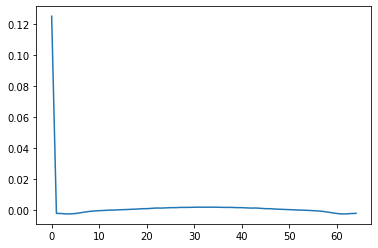

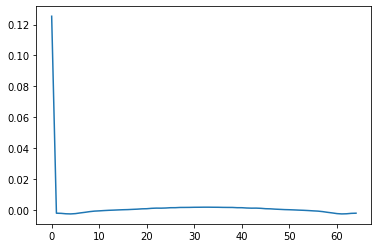

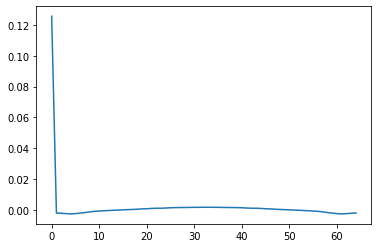

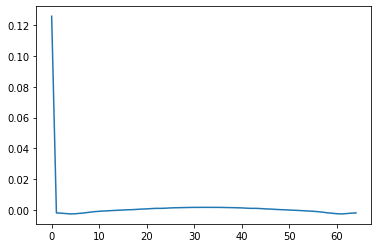

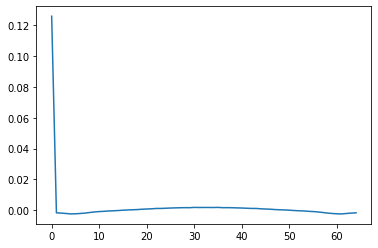

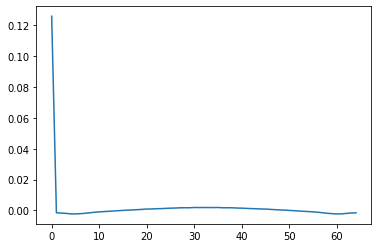

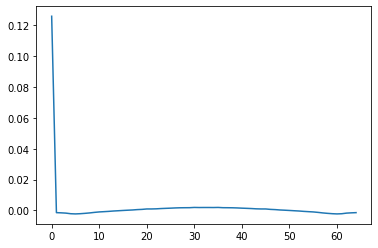

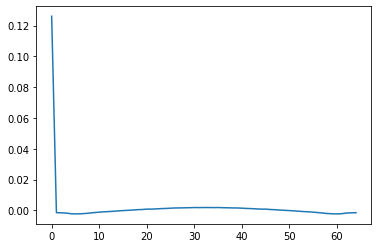

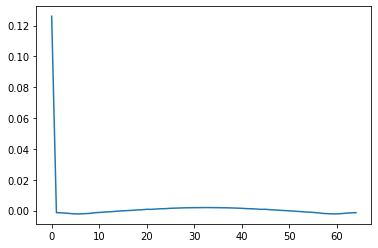

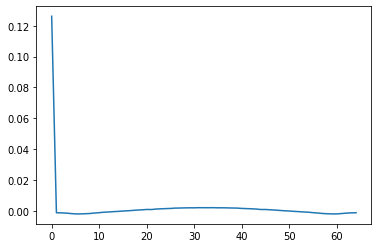

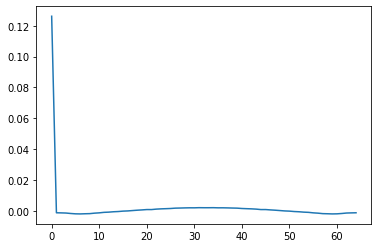

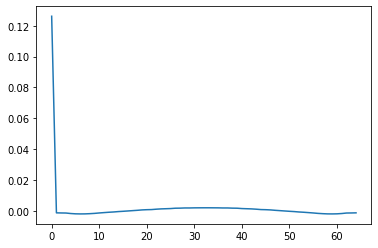

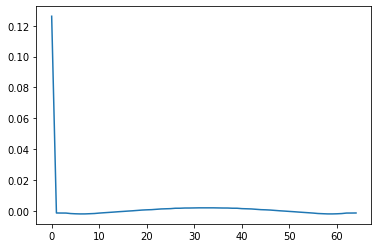

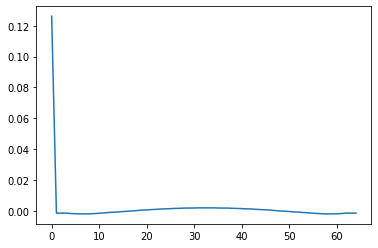

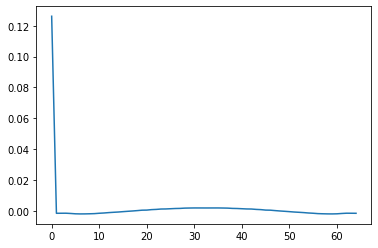

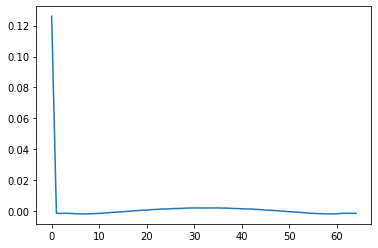

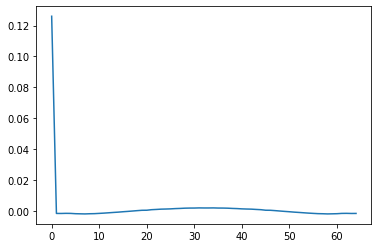

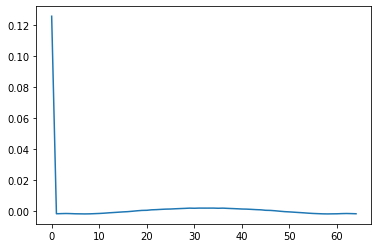

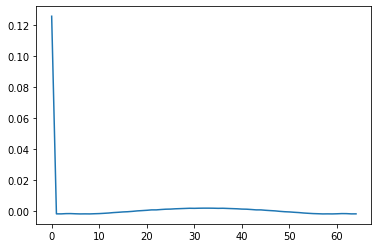

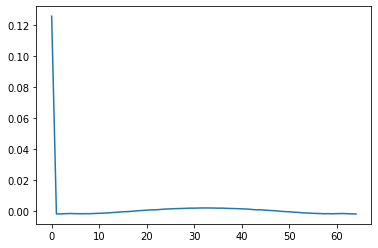

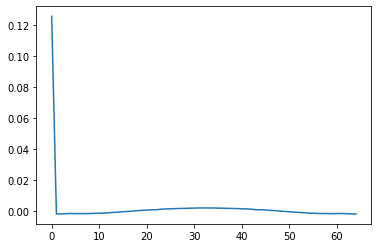

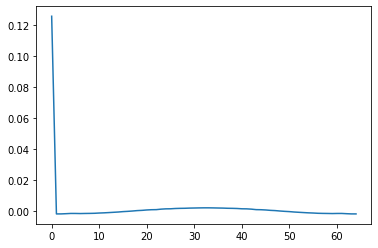

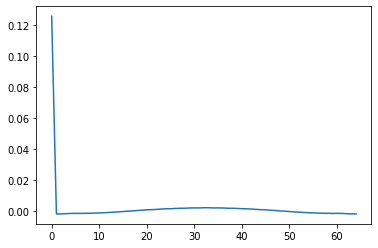

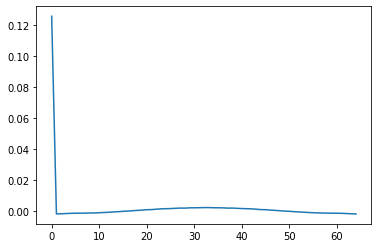

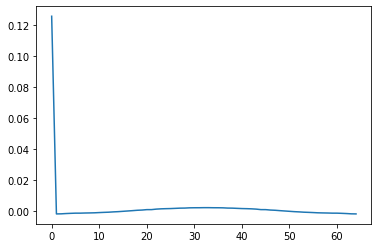

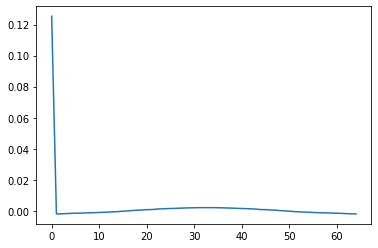

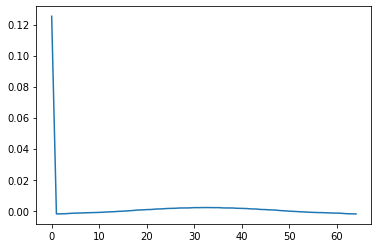

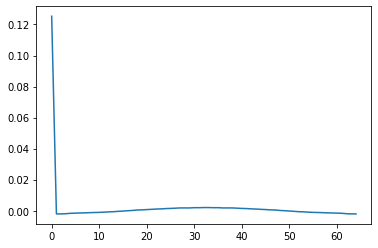

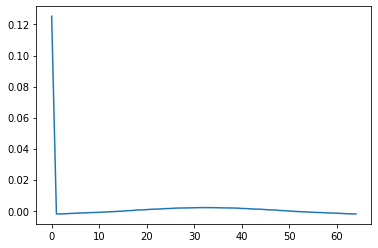

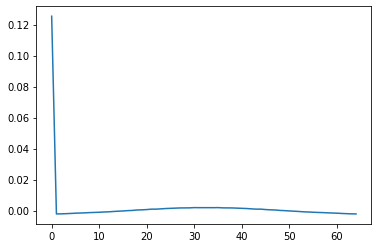

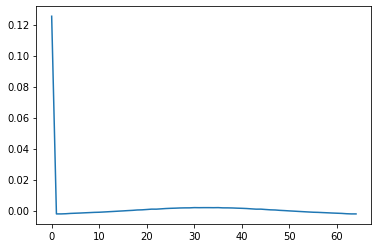

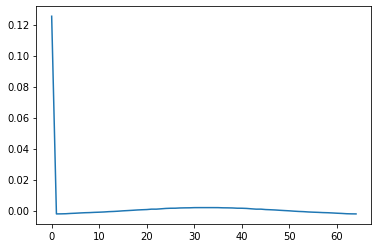

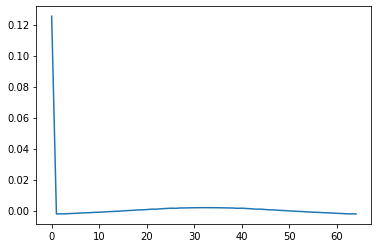

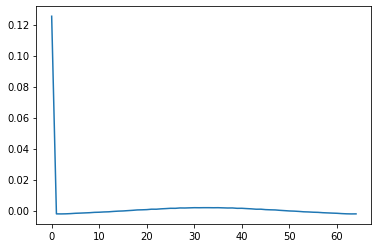

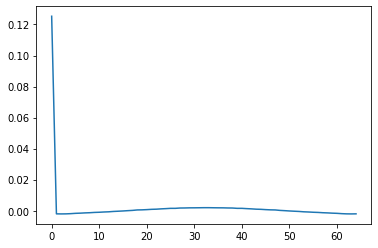

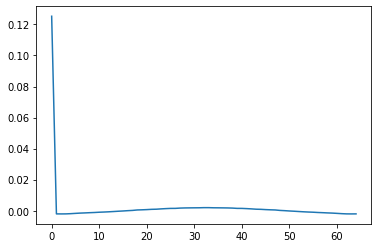

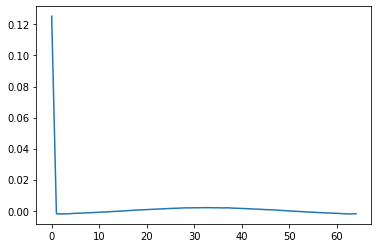

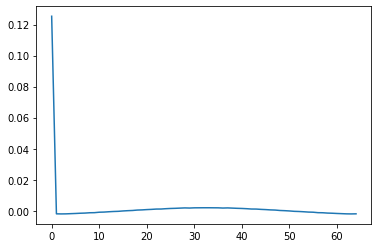

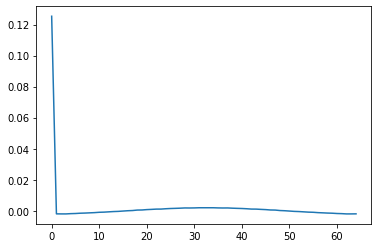

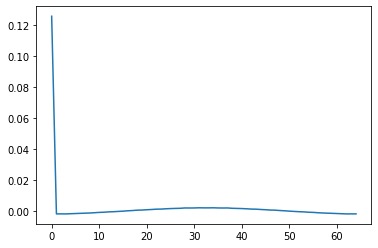

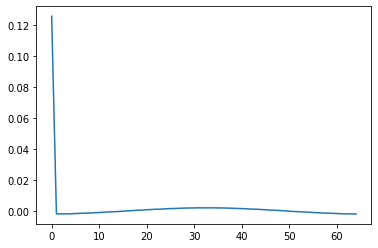

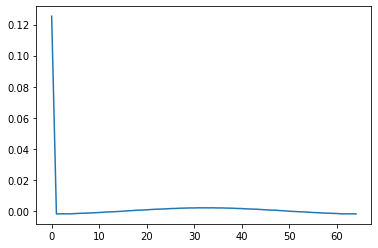

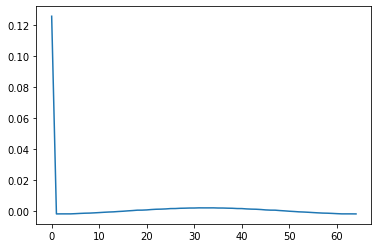

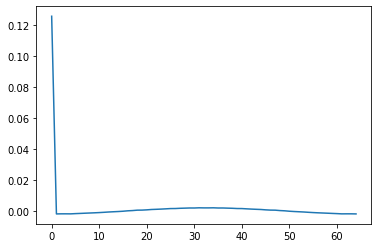

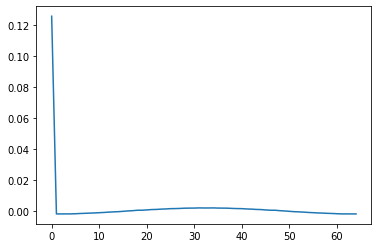

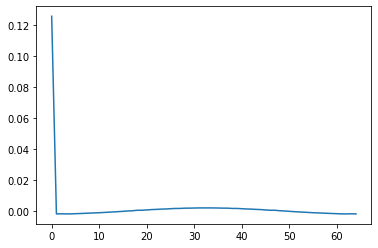

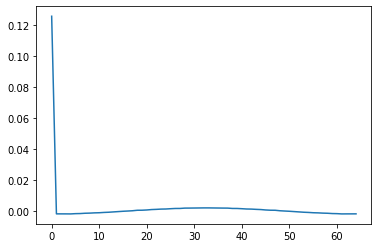

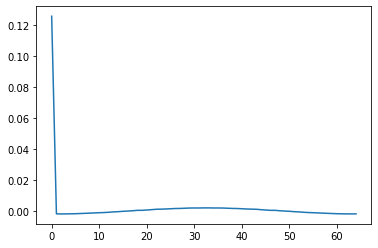

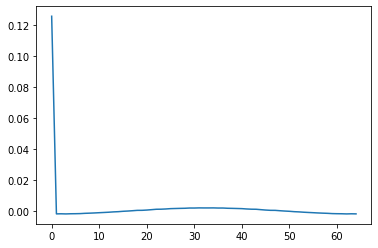

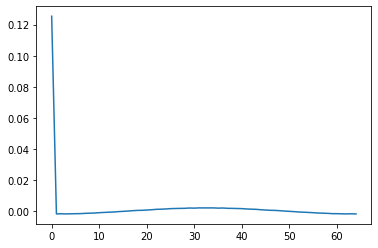

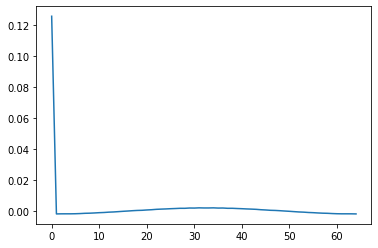

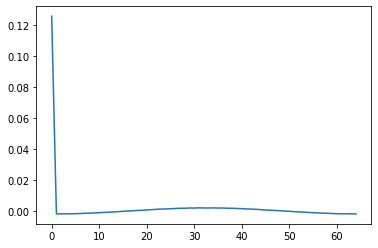

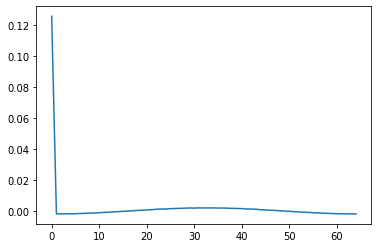

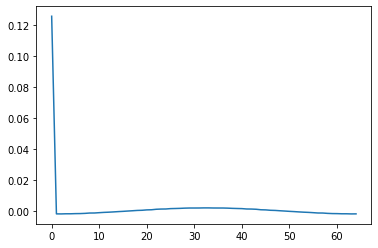

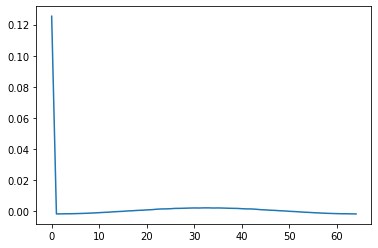

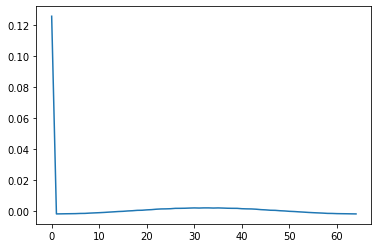

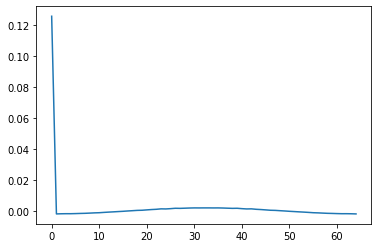

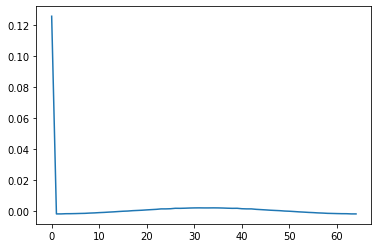

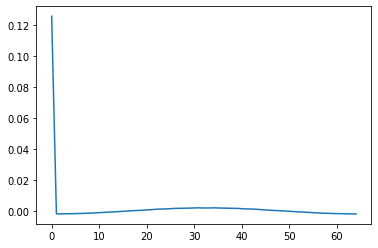

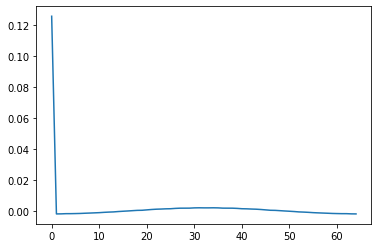

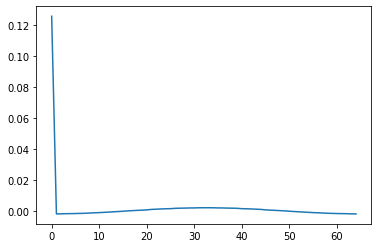

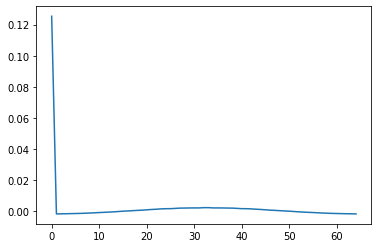

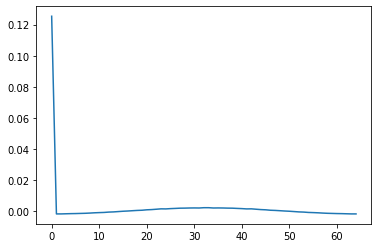

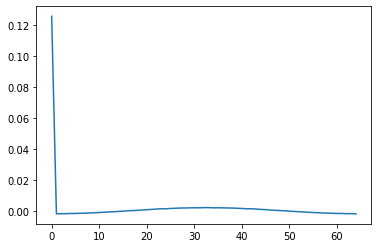

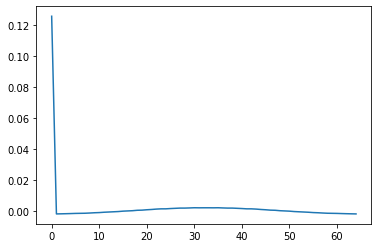

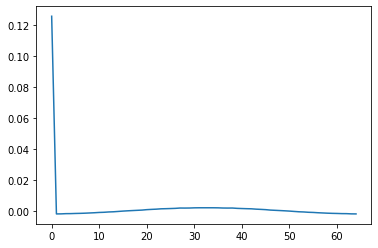

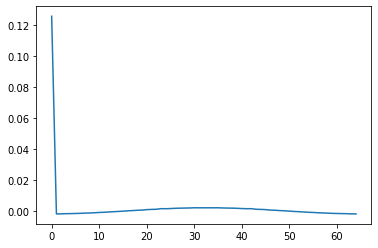

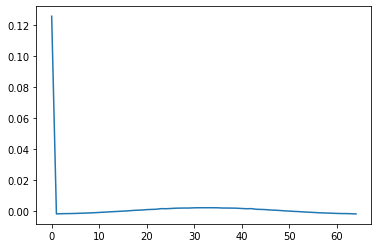

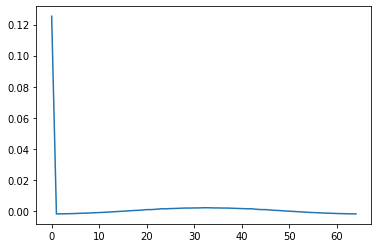

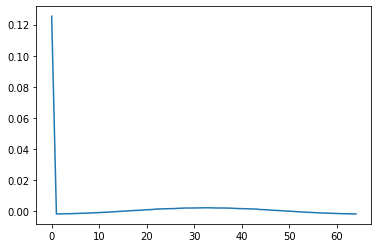

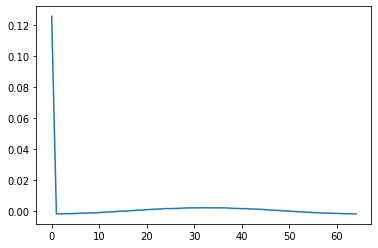

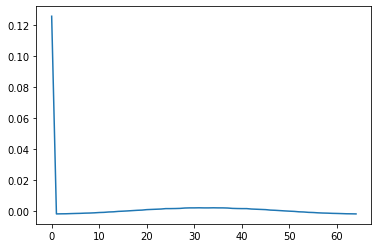

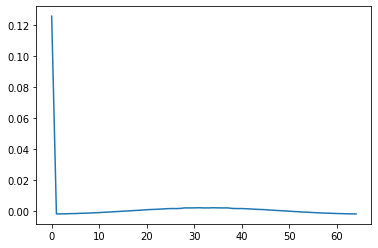

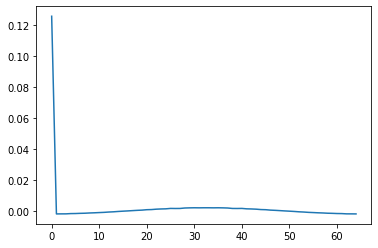

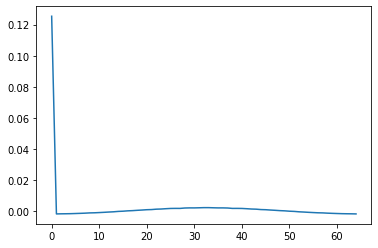

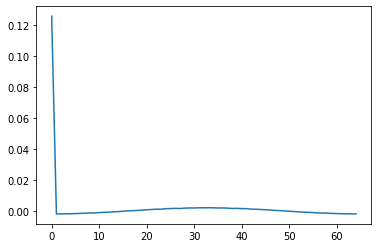

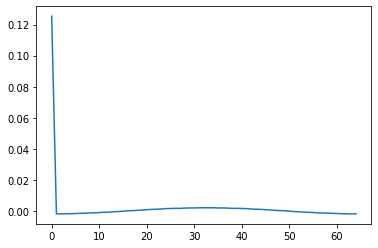

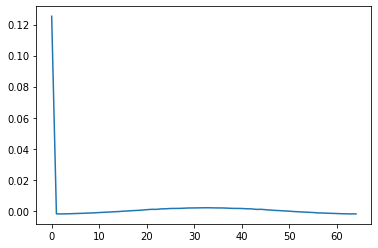

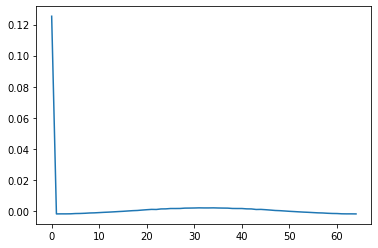

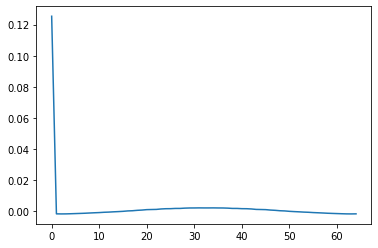

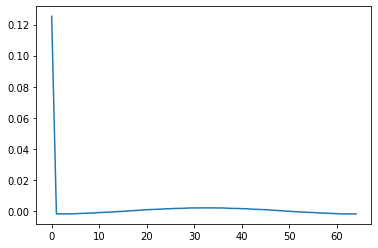

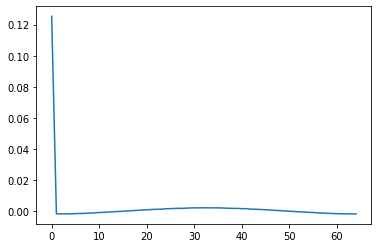

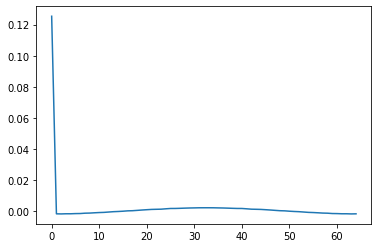

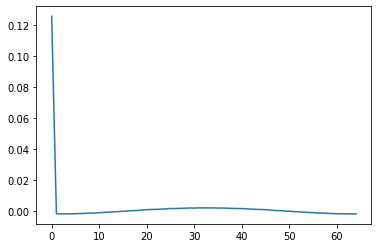

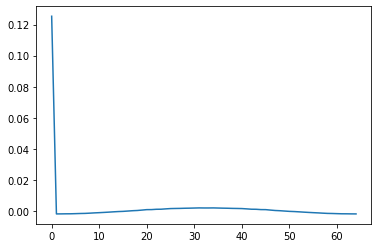

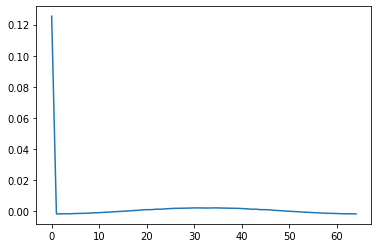

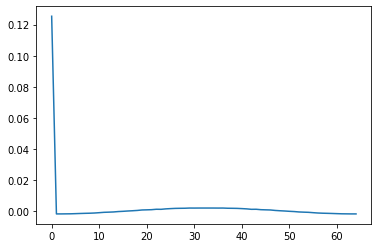

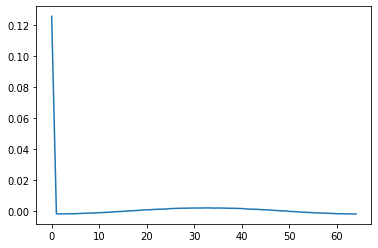

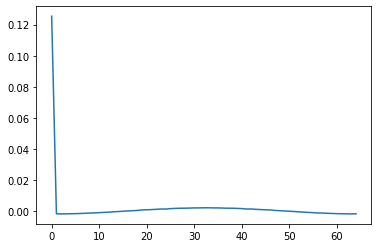

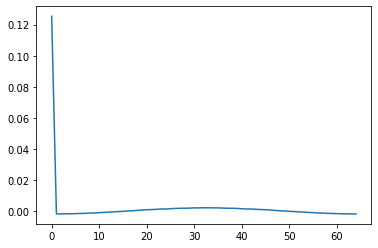

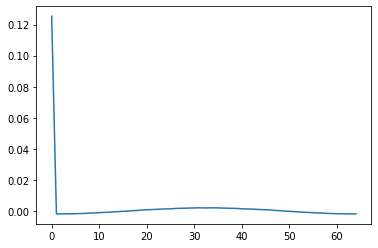

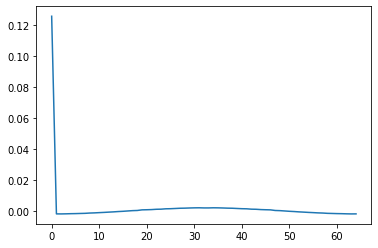

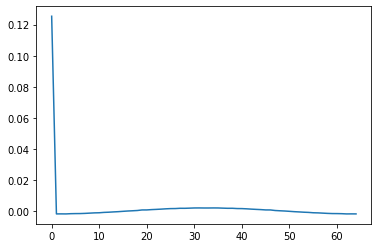

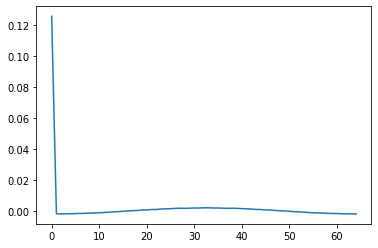

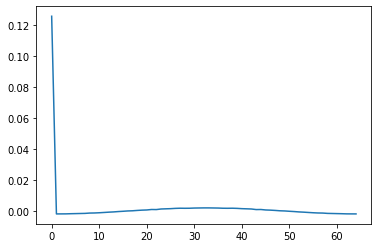

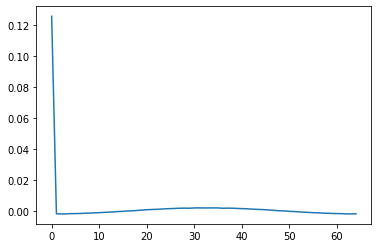

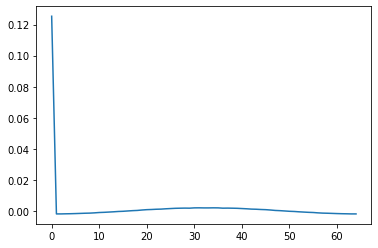

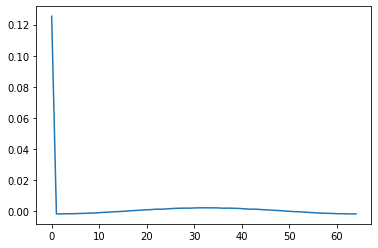

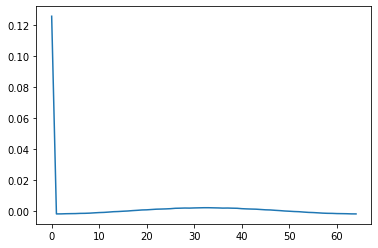

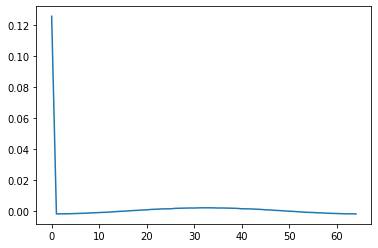

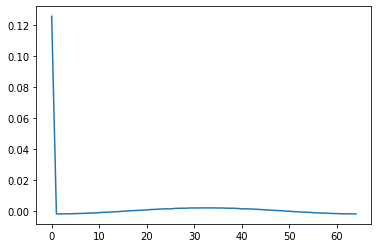

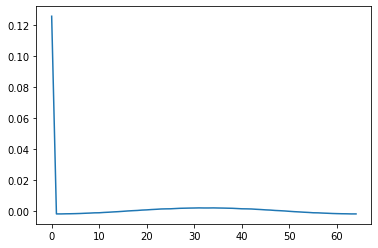

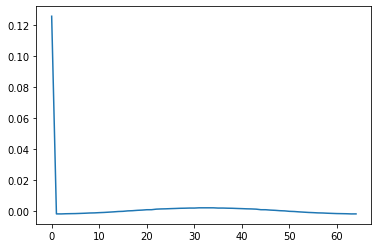

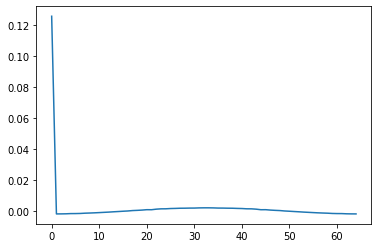

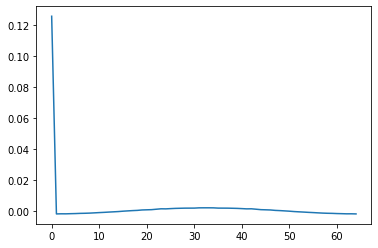

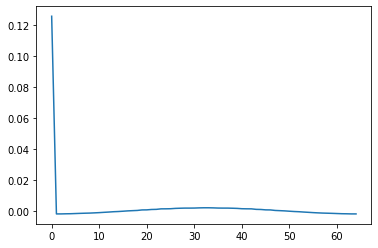

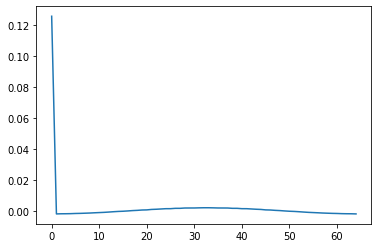

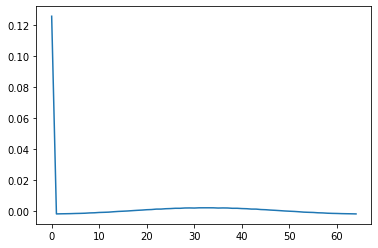

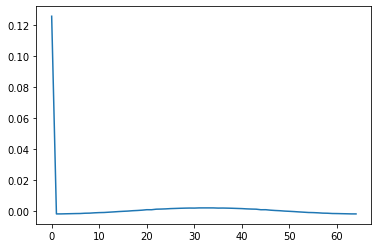

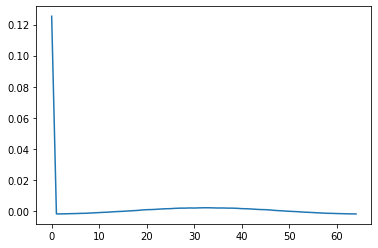

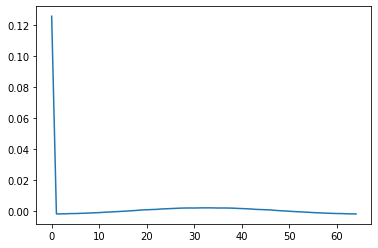

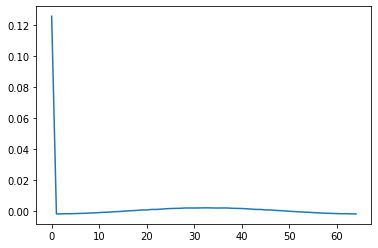

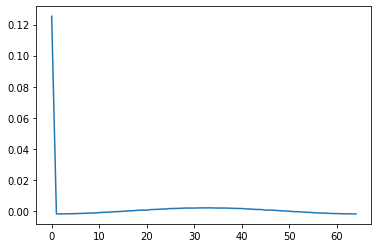

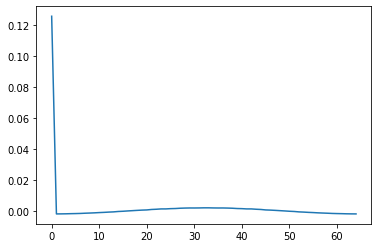

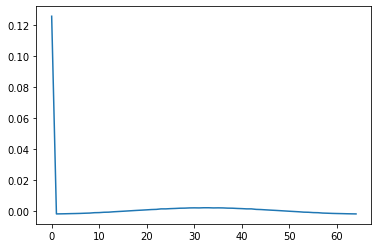

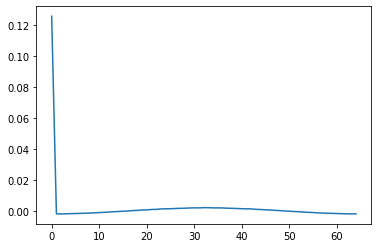

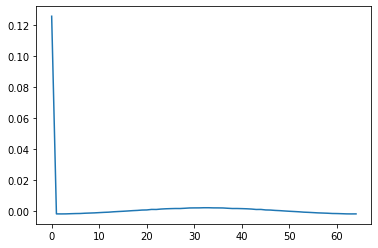

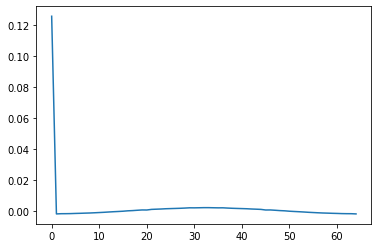

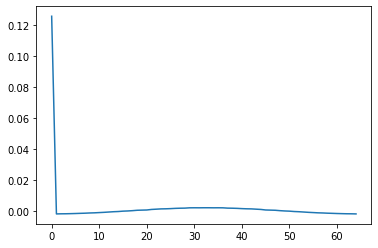

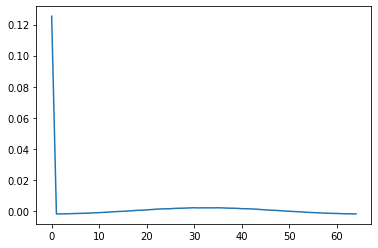

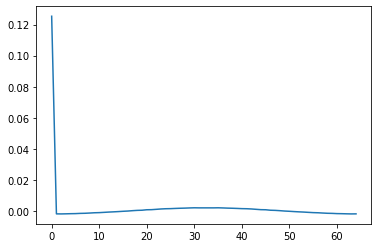

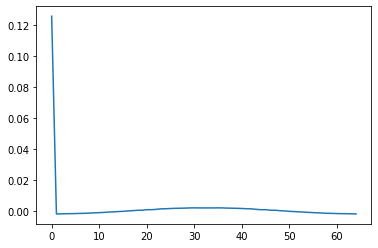

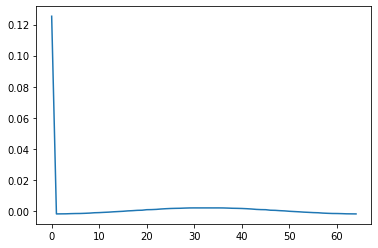

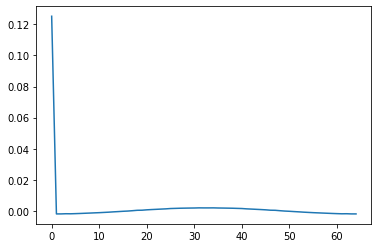

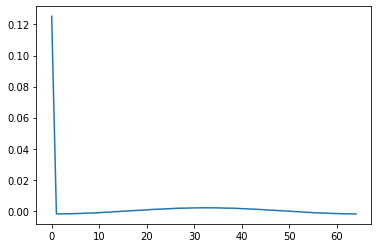

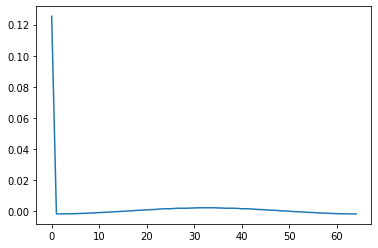

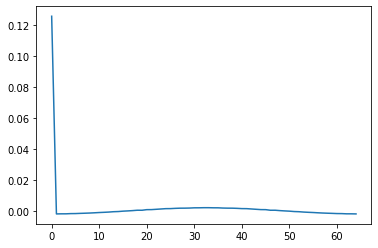

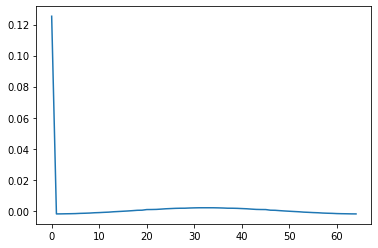

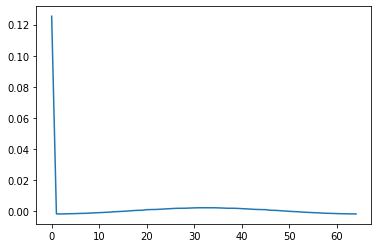

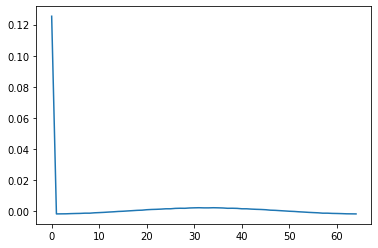

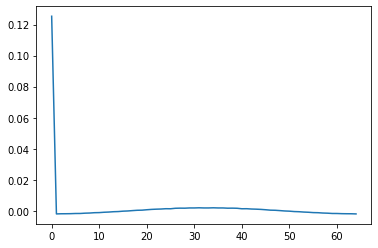

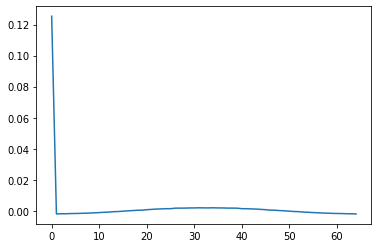

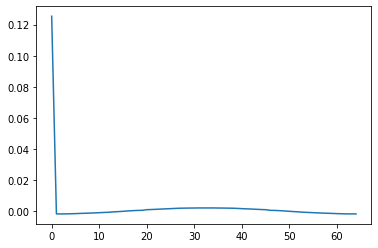

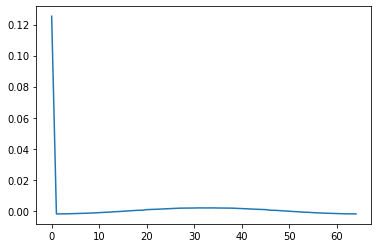

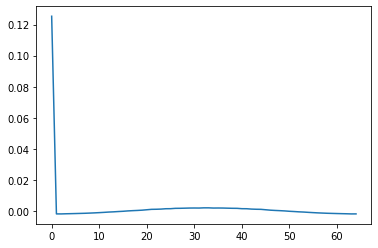

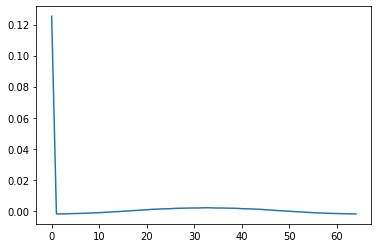

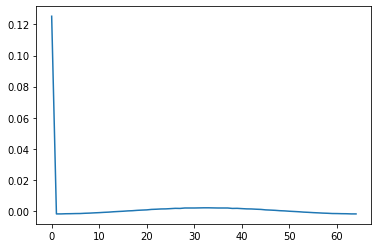

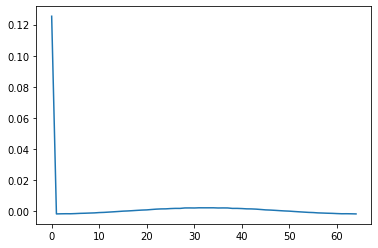

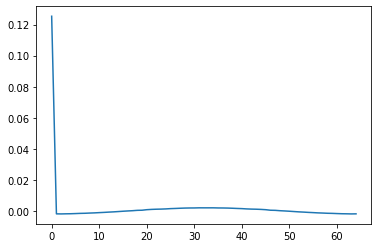

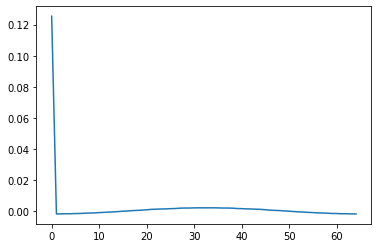

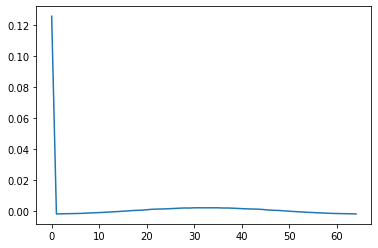

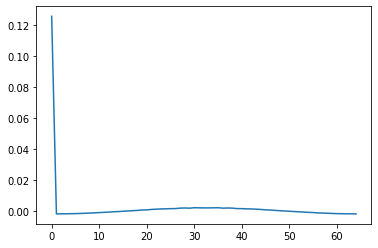

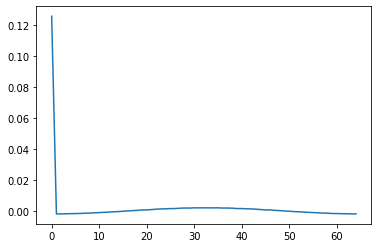

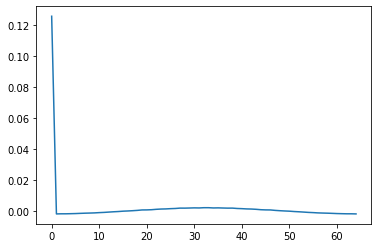

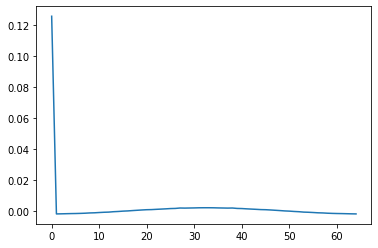

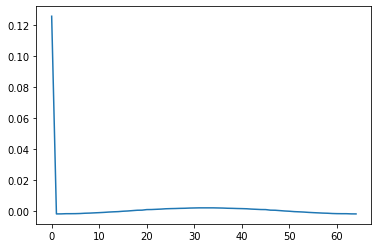

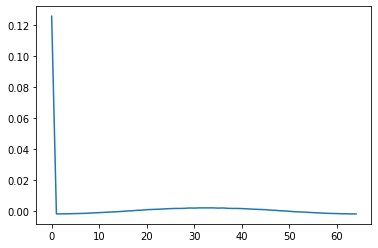

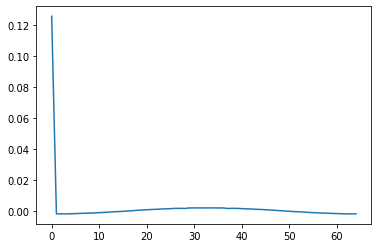

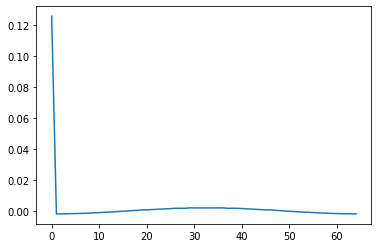

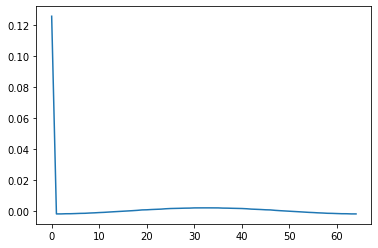

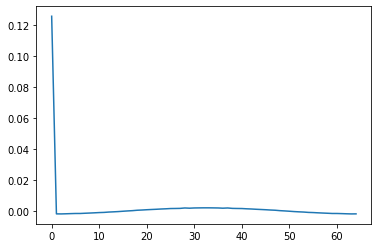

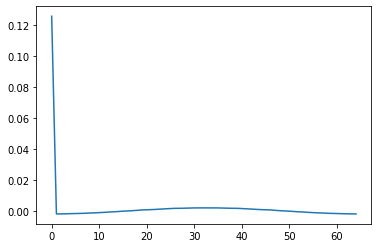

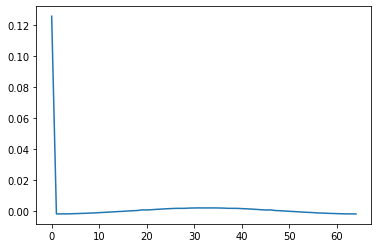

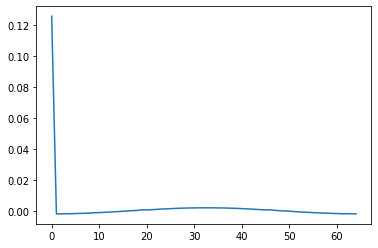

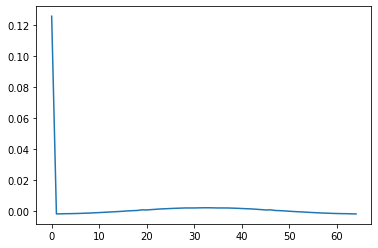

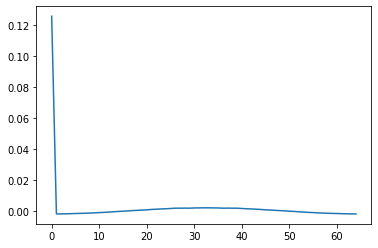

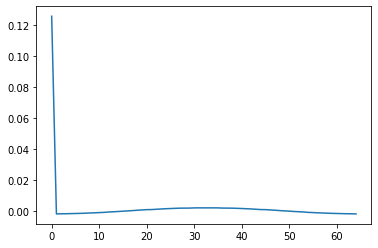

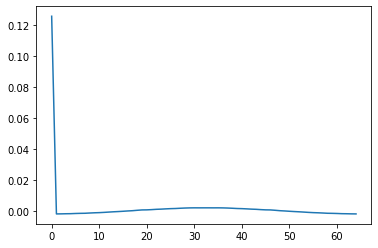

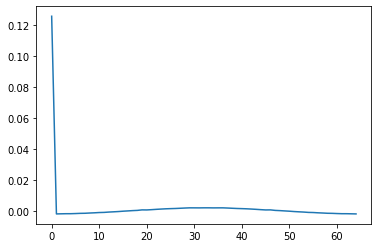

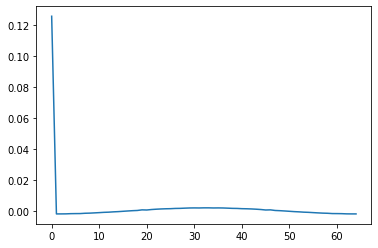

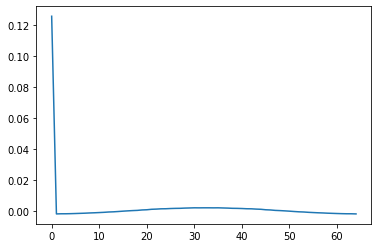

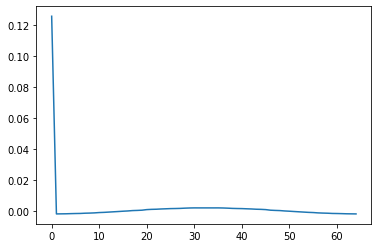

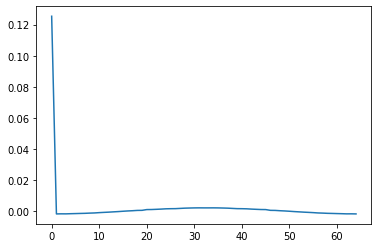

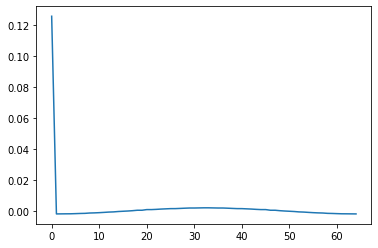

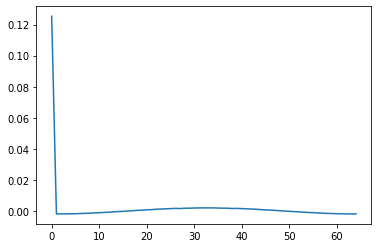

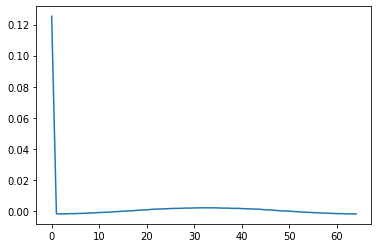

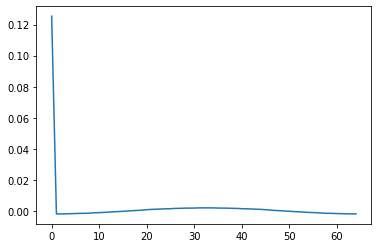

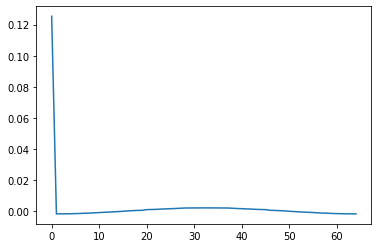

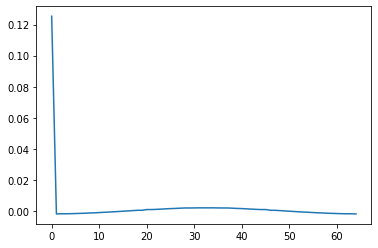

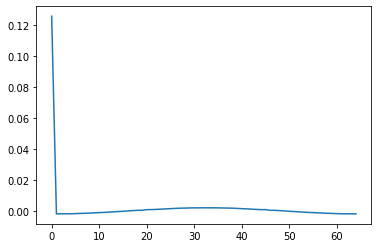

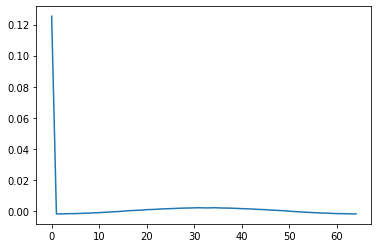

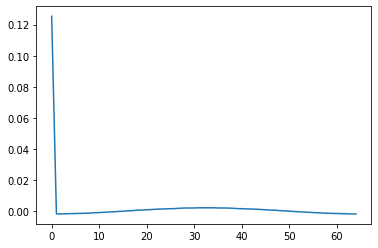

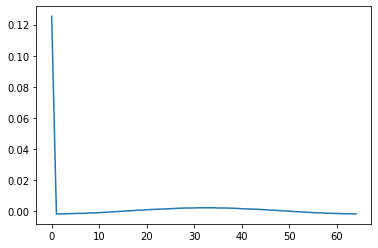

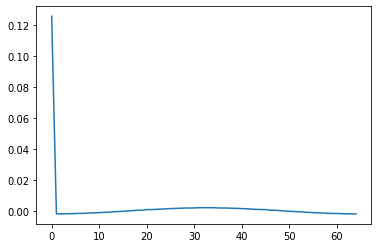

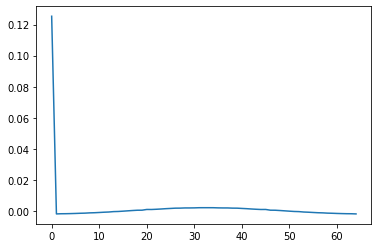

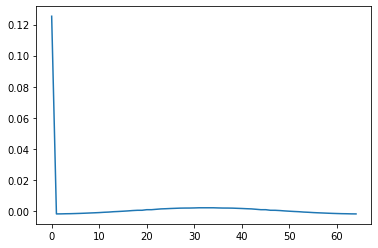

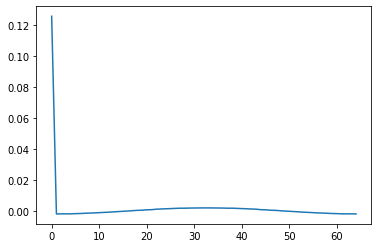

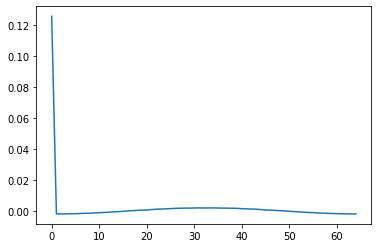

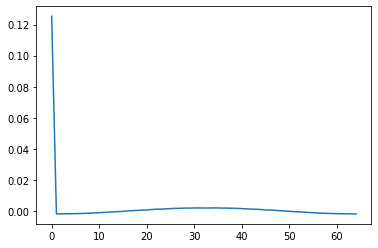

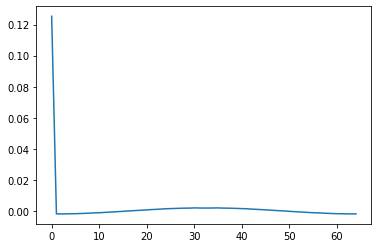

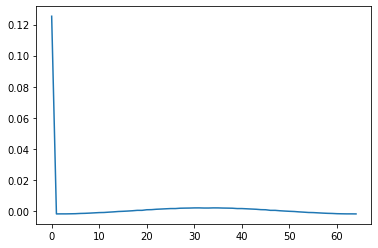

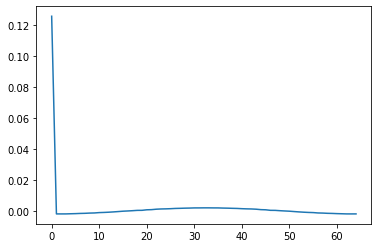

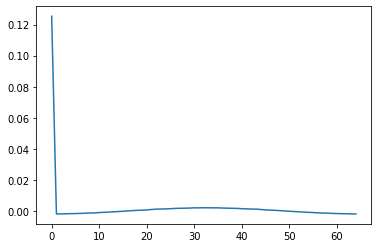

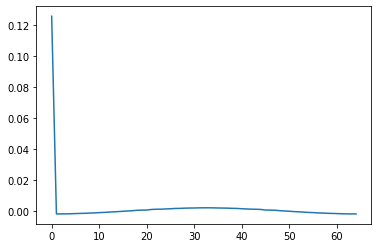

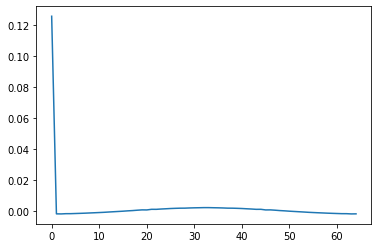

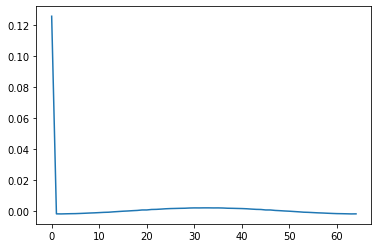

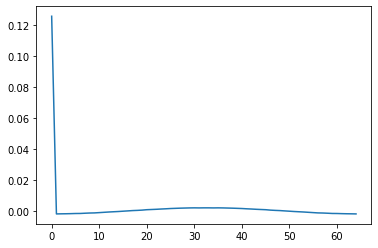

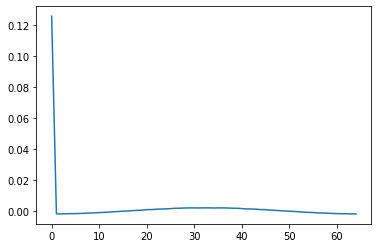

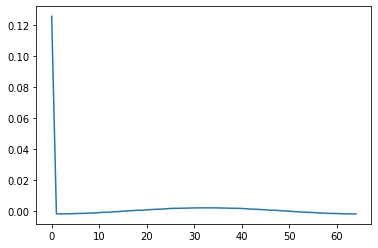

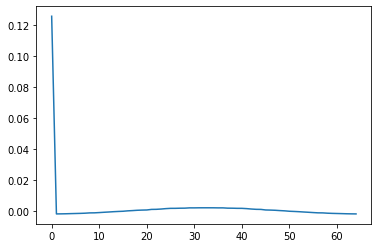

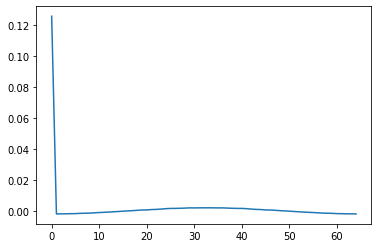

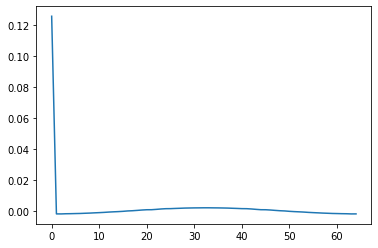

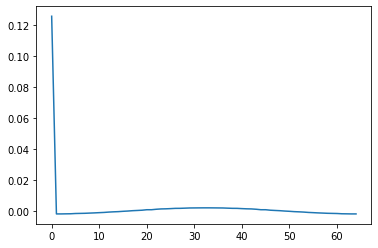

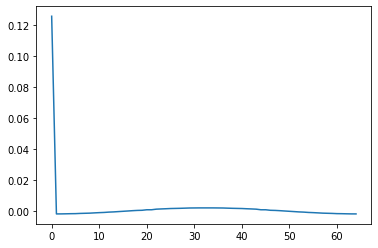

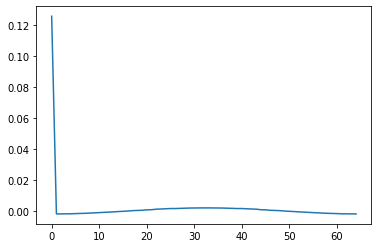

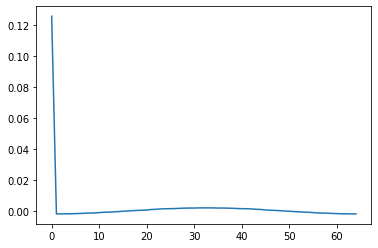

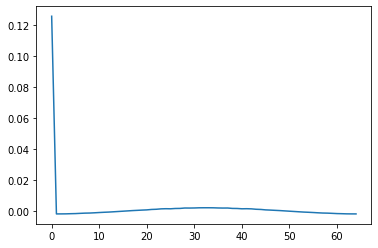

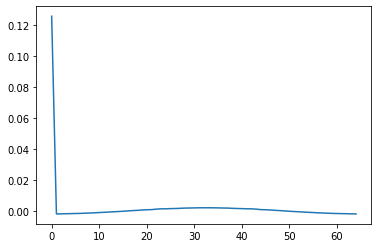

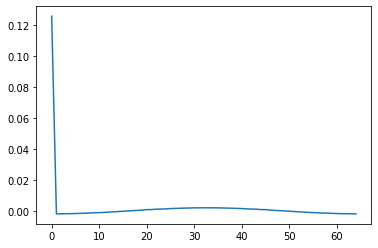

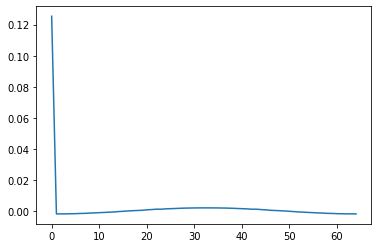

KeyboardInterrupt: 

In [14]:
for i in range(512*512):
    signal = flatten_dataset_x[0][i]
    signal = to_FFT(signal)
    plt.plot(signal)
    plt.show()
    plt.close('all')

In [ ]:
############################################################################################################
plt.figure(figsize=(2 / 2.54, 2 / 2.54), dpi=600)
plt.gca().set_axis_off()
plt.axis('off')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0, wspace=0.0, hspace=0.0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
############################################################################################################
img = dataset_x[0,:,:,0]
img = img.astype('float32')
plt.imshow(img)
plt.show()
plt.close('all')

In [ ]:
img_frames = dataset_x[0]
print(img_frames.shape)

In [ ]:
img_frames_2d = np.transpose(img_frames, [2, 0, 1])

In [ ]:
img_fft2d = to_inverse_FFT2D(img_frames_2d)

In [ ]:
img_ifft2d = to_inverse_FFT2D(img_fft2d)
print(img_ifft2d)

In [ ]:
img_fft = to_FFT(img_frames)
img_ifft = to_inverse_FFT(img_fft)
print(img_ifft)

In [ ]:
plt.imshow(img_ifft[:,:,-1])
plt.show()

In [ ]:
plt.imshow(img_ifft2d[-1,:,:])
plt.show()